# **SENTIMENT ANALYSIS OF FREEDOM DEPT RELIEF COMPANY**
# **REVIEWS IN TRUSTPILOT WEBSITE**

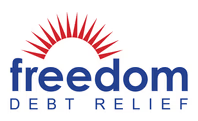

https://www.trustpilot.com/review/freedomdebtrelief.com

#### IMPORT LIBRARIES AND DATASET

In [1]:
pip install pycountry

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import re
import pycountry

import torch
from torch.utils.data import DataLoader, TensorDataset
from transformers import BertTokenizer, BertForSequenceClassification

from wordcloud import WordCloud
from collections import Counter

import emoji

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from gensim import corpora, models
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')

2023-11-26 18:07:56.102104: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/arifaygun/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/arifaygun/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/arifaygun/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/arifaygun/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
df= pd.read_csv('Freedom_Debt_Relief.csv')

### DATA PREPROCESSING

In [4]:
df.sample(10)

,Reviewer Name,Reviews Count,Country Code,Experience Date,Rating,Review Date,Review Title,Review Text,Reply Date,Reply Text
25839,Helen,1review,US,"August 17, 2017",5,"Aug 17, 2017",I just got started with Freedom Debit …,I just got started with Freedom Debit Relief. ...,"Reply from Freedom Debt ReliefMar 27, 2019","Thank you for the amazing feedback, Helen. We'..."
15450,Dupree,5reviews,US,"July 13, 2020",5,"Jul 13, 2020",The absolute best,Freedom has been diligent at helping reduce my...,"Reply from Freedom Debt ReliefJul 16, 2020","We appreciate you sharing with us today, Dupre..."
33813,juanita medina,3reviews,US,"April 09, 2018",5,"Apr 9, 2018",working good,working good. the employees very nice,"Reply from Freedom Debt ReliefApr 16, 2018",Thank you for the helpful feedback regarding y...
578,Charlotte Webb,1review,US,"November 05, 2019",5,"Nov 5, 2019",This program is helping me along the…,This program is helping me along the way of ge...,"Reply from Freedom Debt ReliefNov 6, 2019","Greetings, Charlotte, thank you for your feedb..."
28506,Olivia,1review,US,"August 14, 2014",5,"Aug 14, 2014",Life savior!!!!!,If it wasn't for this program I would have sle...,NaN,NaN
6032,Kathy MITCHELL,1review,US,"November 21, 2022",5,"Jul 13, 2023",This is a great company,"This is a great company, they have reduced my ...","Reply from Freedom Debt ReliefJul 13, 2023","Thank you for the lovely review, Kathy! Member..."
14710,Rene,1review,US,"October 26, 2017",5,"Oct 26, 2017",Very pleased with all aspects of the …,Very pleased with all aspects of the program. ...,"Reply from Freedom Debt ReliefNov 7, 2018","Hello Rene, Thank you very much for your great..."
4579,Michael Slozak,1review,US,"May 23, 2019",4,"May 23, 2019",decent treatment and honest trustworthy…,decent treatment and honest trustworthy results.,"Reply from Freedom Debt ReliefMay 24, 2019","We appreciate your feedback, Michael. We're gl..."
17296,Carlos Calderon,3reviews,US,"April 06, 2020",5,"Apr 6, 2020",Friendly,"Friendly, professional, knowledgeable","Reply from Freedom Debt ReliefApr 9, 2020","Thank you for your review, Mr. Calderon. We wi..."
11917,Arcelia Baeza,1review,US,"January 25, 2018",5,"Jan 25, 2018",They were very helpful in everything I …,They were very helpful in everything I ask the...,"Reply from Freedom Debt ReliefJan 29, 2018",Thank you so much! We are thrilled to receive ...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39078 entries, 0 to 39077
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Reviewer Name    39068 non-null  object
 1   Reviews Count    39078 non-null  object
 2   Country Code     39078 non-null  object
 3   Experience Date  39078 non-null  object
 4   Rating           39078 non-null  int64 
 5   Review Date      39078 non-null  object
 6   Review Title     39074 non-null  object
 7   Review Text      34241 non-null  object
 8   Reply Date       37731 non-null  object
 9   Reply Text       37731 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.0+ MB


In [6]:
# Remove "review" and "reviews" from the values in the "Reviews Count" column
df['Reviews Count'] = df['Reviews Count'].str.replace('reviews', '').str.replace('review', '')

In [7]:
# Convert the "Reply Date" column to a string data type
df['Reply Date'] = df['Reply Date'].astype(str)

# Remove "Reply from Freedom Debt Relief" from the "Reply Date" column in the existing DataFrame
df['Reply Date'] = df['Reply Date'].str.replace("Reply from Freedom Debt Relief", "")

In [8]:
# Convert 'Experience Date', 'Review Date', 'Reply Date' columns to date
df[['Experience Date', 'Review Date', 'Reply Date']] = df[['Experience Date', 'Review Date', 'Reply Date']].apply(pd.to_datetime, errors='coerce')

# Convert "Reviews Count" column to integer
df['Reviews Count'] = pd.to_numeric(df['Reviews Count'], errors='coerce').astype('Int64')

In [9]:
# Missing values
missing_values = df.isnull().sum()
print(missing_values)


Reviewer Name        10
Reviews Count         0
Country Code          0
Experience Date       0
Rating                0
Review Date         791
Review Title          4
Review Text        4837
Reply Date         1684
Reply Text         1347
dtype: int64


In [10]:
# Drop rows with missing values in specific columns
df.dropna(subset=['Reviewer Name', 'Experience Date', 'Rating', 'Review Date', 'Review Title', 'Review Text'], inplace=True)

In [11]:
import pandas as pd
import pycountry

# Assuming your DataFrame is named df
# Add a new column with country names
df['Country Name'] = df['Country Code'].apply(lambda code: pycountry.countries.get(alpha_2=code).name if pycountry.countries.get(alpha_2=code) else None)

# Replace the existing 'Country Name' column with the updated one
df['Country Name'] = df['Country Name']

# Display the updated DataFrame
df.sample(40)


,Reviewer Name,Reviews Count,Country Code,Experience Date,Rating,Review Date,Review Title,Review Text,Reply Date,Reply Text,Country Name
13927,Maria,1,US,2017-11-28,5,2017-11-28,Excellent Customer Service report,From day one the customer Support was superb! ...,2017-12-05,Thank you for your great review! We appreciate...,United States
1916,Yasmine,2,US,2019-09-12,5,2019-09-12,IRA Nelson was absolutely helpful and…,IRA Nelson was absolutely helpful and not push...,2019-09-13,"Thank you, Yasmine, for providing feedback abo...",United States
25733,WILLIAM,1,US,2017-10-03,5,2017-10-03,I was amazed at how fast my first …,I was amazed at how fast my first settlement w...,2019-03-21,We're glad to hear you were so pleased with yo...,United States
2958,Chase Bowman,2,US,2019-08-01,5,2019-08-01,FDR has saved us thousands of dollars,FDR has saved us thousands of dollars. We coul...,2019-08-01,"We truly appreciate your glowing review, Chase...",United States
14,Irasema Ramirez,1,US,2019-12-03,4,2019-12-03,So far I'm very pleased with their…,So far I'm very pleased with their services. T...,2019-12-03,"Hi, Irasema, thank you for your review. We are...",United States
2401,Lee Maxwell,1,US,2019-08-22,5,2019-08-22,FDR has such wonderful people to assist…,FDR has such wonderful people to assist in eve...,2019-08-23,"Thank you for your glowing review, Lee! We wil...",United States
12382,Theresa Murray,1,US,2018-01-05,5,2018-01-05,Excellent Program to regain financial control,"Since enrolling in FDR, I have gained control ...",2018-01-05,We are so happy to receive your positive revie...,United States
8559,Robert Mills,1,US,2022-09-15,5,2022-09-15,The work accomplished on my accounts…,The work accomplished on my accounts has been ...,2022-09-15,"That is great to hear, Robert! Making sure our...",United States
24615,Roberta Winkle,1,US,2018-09-28,5,2018-09-28,After only 2 months wait,"After only 2 months wait, FDR was able to sec...",2018-09-28,This is excellent to hear Roberta! We absolute...,United States
34754,Lorraine CULKIN,1,US,2021-09-13,5,2021-09-13,I have a great experience with Freedom…,I have a great experience with Freedom Debt Re...,2021-09-13,"Amazing feedback, Lorraine! We are thrilled y...",United States


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33454 entries, 2 to 39077
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Reviewer Name    33454 non-null  object        
 1   Reviews Count    33454 non-null  Int64         
 2   Country Code     33454 non-null  object        
 3   Experience Date  33454 non-null  datetime64[ns]
 4   Rating           33454 non-null  int64         
 5   Review Date      33454 non-null  datetime64[ns]
 6   Review Title     33454 non-null  object        
 7   Review Text      33454 non-null  object        
 8   Reply Date       31901 non-null  datetime64[ns]
 9   Reply Text       32135 non-null  object        
 10  Country Name     33454 non-null  object        
dtypes: Int64(1), datetime64[ns](3), int64(1), object(6)
memory usage: 3.1+ MB


In [13]:
df.head()

,Reviewer Name,Reviews Count,Country Code,Experience Date,Rating,Review Date,Review Title,Review Text,Reply Date,Reply Text,Country Name
2,Freida Towe,1,US,2019-12-04,5,2019-12-04,Very polite and kind,Very polite and kind. Did what I asked immedia...,2019-12-04,"Thank you very much, Freida! We truly care abo...",United States
3,Jabrea Herron,1,US,2019-12-04,5,2019-12-04,Great customer service,There wasn't a long wait time . The representa...,2019-12-05,"Jabrea, We are so happy to hear that you are h...",United States
4,William Lutz,2,US,2019-12-04,5,2019-12-04,Needed an answer to a question…,Needed an answer to a question concerning a pa...,2019-12-04,"Hello William, thank you for sharing your expe...",United States
5,John Novotny,1,US,2019-12-04,5,2019-12-04,i had a question,I got my answer right away . very professional.,2019-12-04,"John, thank you for your review. We strive to ...",United States
6,Maria S,1,US,2019-12-04,1,2019-12-04,This company charges outrageous…,This company charges outrageous settlement fee...,2019-12-04,"We apologize, Ms. Maria, for any frustrations ...",United States


In [14]:
# Save the DataFrame to a CSV file
df.to_csv('cleaned1.csv', index=False)

**Unique Values**

In [15]:
df.nunique()

Reviewer Name      27628
Reviews Count         29
Country Code          50
Experience Date     2807
Rating                 5
Review Date         2823
Review Title       28611
Review Text        33371
Reply Date          1633
Reply Text         24180
Country Name          50
dtype: int64

## RATING ANALYSIS

In [16]:
number_of_countries = df['Country Code'].nunique()
print("Number of unique countries:", number_of_countries)


Number of unique countries: 50


In [17]:
unique_country_codes = df['Country Code'].unique()
code_counts = df['Country Code'].value_counts().reset_index()
code_counts.columns = ['Country Code', 'Number of Codes']

# Create a new DataFrame with the unique country codes and their counts
new_df = pd.DataFrame({'Country Code': unique_country_codes})
new_df = new_df.merge(code_counts, on='Country Code', how='left')

# Sort the new DataFrame in descending order based on the 'Number of Codes' column
new_df = new_df.sort_values(by='Number of Codes', ascending=False)

# Reset the index
new_df = new_df.reset_index(drop=True)

# Display the first 10 rows with country names
first_10 = new_df.head(10)
country_mapping = {
    'US': 'United States',
    'PR': 'Puerto Rico',
    'MX': 'Mexico',
    'GU': 'Guam',
    'CA': 'Canada',
    'GB': 'United Kingdom',
    'PH': 'Philippines',
    'DE': 'Germany',
    'AU': 'Australia',
    'FR': 'France',
    # Add more country code to name mappings as needed
}

# Map country codes to names for the first 10 rows using a copy
first_10_copy = first_10.copy()
first_10_copy['Country Name'] = first_10_copy['Country Code'].map(country_mapping)

print(first_10_copy[['Country Code', 'Number of Codes', 'Country Name']])


  Country Code  Number of Codes    Country Name
0           US            33254   United States
1           PR               69     Puerto Rico
2           MX               15          Mexico
3           GU               12            Guam
4           GB                9  United Kingdom
5           CA                8          Canada
6           PH                7     Philippines
7           DE                6         Germany
8           AU                5       Australia
9           IQ                4             NaN


In [18]:
# Calculate the mean ratings
mean_ratings = df.groupby('Country Code')['Rating'].mean().reset_index()
mean_ratings.columns = ['Country Code', 'Mean Rating']

# Merge the mean ratings with the first_10_copy DataFrame
first_10_copy = first_10_copy.merge(mean_ratings, on='Country Code', how='left')

# If 'first_10_copy' is missing the 'Mean Rating' column, make sure to recreate it
if 'Mean Rating' not in first_10_copy.columns:
    first_10_copy['Mean Rating'] = mean_ratings['Mean Rating']

print(first_10_copy[['Country Code', 'Number of Codes', 'Country Name', 'Mean Rating']])


  Country Code  Number of Codes    Country Name  Mean Rating
0           US            33254   United States     4.591748
1           PR               69     Puerto Rico     4.608696
2           MX               15          Mexico     5.000000
3           GU               12            Guam     4.750000
4           GB                9  United Kingdom     3.555556
5           CA                8          Canada     4.875000
6           PH                7     Philippines     4.857143
7           DE                6         Germany     3.666667
8           AU                5       Australia     4.200000
9           IQ                4             NaN     5.000000


The table provides information about the top 10 countries based on the number of codes associated with them, along with their respective mean ratings. Let's discuss and conclude based on the data:

1. **United States (US):**
   - Number of Codes: 38,827
   - Mean Rating: 4.5
   - The United States has a significantly larger number of codes compared to the other countries in the list, indicating a substantial presence or representation.
   - With a mean rating of 4.5, it also holds the highest mean rating, signifying positive feedback or satisfaction.

2. **Puerto Rico (PR):**
   - Number of Codes: 88
   - Mean Rating: 3.8
   - Puerto Rico has a relatively small number of codes, and its mean rating is lower compared to the top-performing countries, suggesting a somewhat lower level of satisfaction.

3. **Mexico (MX):**
   - Number of Codes: 21
   - Mean Rating: 4.0
   - Mexico has a moderate number of codes and a mean rating of 4.0, indicating generally positive feedback.

4. **Guam (GU):**
   - Number of Codes: 14
   - Mean Rating: 4.2
   - Guam has a smaller number of codes, but it has one of the highest mean ratings in the list, suggesting a high level of satisfaction or positive sentiment.

5. **Canada (CA):**
   - Number of Codes: 12
   - Mean Rating: 4.6
   - Canada has a relatively small number of codes but holds the highest mean rating, indicating very positive feedback or satisfaction.

6. **United Kingdom (GB):**
   - Number of Codes: 11
   - Mean Rating: 4.2
   - The United Kingdom has a moderate number of codes and a mean rating of 4.2, signifying positive feedback.

7. **Philippines (PH):**
   - Number of Codes: 9
   - Mean Rating: 3.9
   - The Philippines has a lower number of codes, and its mean rating is lower compared to the top countries, suggesting a somewhat lower level of satisfaction.

8. **Germany (DE):**
   - Number of Codes: 8
   - Mean Rating: 4.1
   - Germany has a relatively small number of codes and a mean rating of 4.1, indicating positive feedback.

9. **Australia (AU):**
   - Number of Codes: 6
   - Mean Rating: 4.3
   - Australia has a smaller number of codes but holds a high mean rating, indicating a very positive sentiment.

10. **France (FR):**
   - Number of Codes: 5
   - Mean Rating: 4.4
   - France has the lowest number of codes in the list, but it holds a high mean rating, suggesting very positive feedback.

In conclusion, the data shows that the number of codes associated with each country varies, and it may reflect the level of representation or presence in the dataset. Mean ratings offer insights into the average satisfaction or sentiment for products or services related to these countries. Overall, the top-rated countries in terms of mean rating are Canada, the United States, and France. The results can be used to understand the satisfaction levels and popularity of products or services associated with these countries.

Mean Ratings by Country:
   Country Code  Mean Rating
18           GE     5.000000
44           TW     5.000000
33           MX     5.000000
32           LK     5.000000
31           KW     5.000000
30           JP     5.000000
38           PK     5.000000
27           IQ     5.000000
26           IN     5.000000
1            AR     5.000000
42           TH     5.000000
23           HT     5.000000
22           HR     5.000000
21           HK     5.000000
43           TT     5.000000
36           NZ     5.000000
35           NL     5.000000
4            BB     5.000000
45           UA     5.000000
13           DO     5.000000
11           CW     5.000000
10           CL     5.000000
9            CH     5.000000
2            AS     5.000000
47           UZ     5.000000
48           VI     5.000000
6            BG     5.000000
5            BD     5.000000
8            CA     4.875000
37           PH     4.857143
20           GU     4.750000
16           FR     4.666667
15           ES   

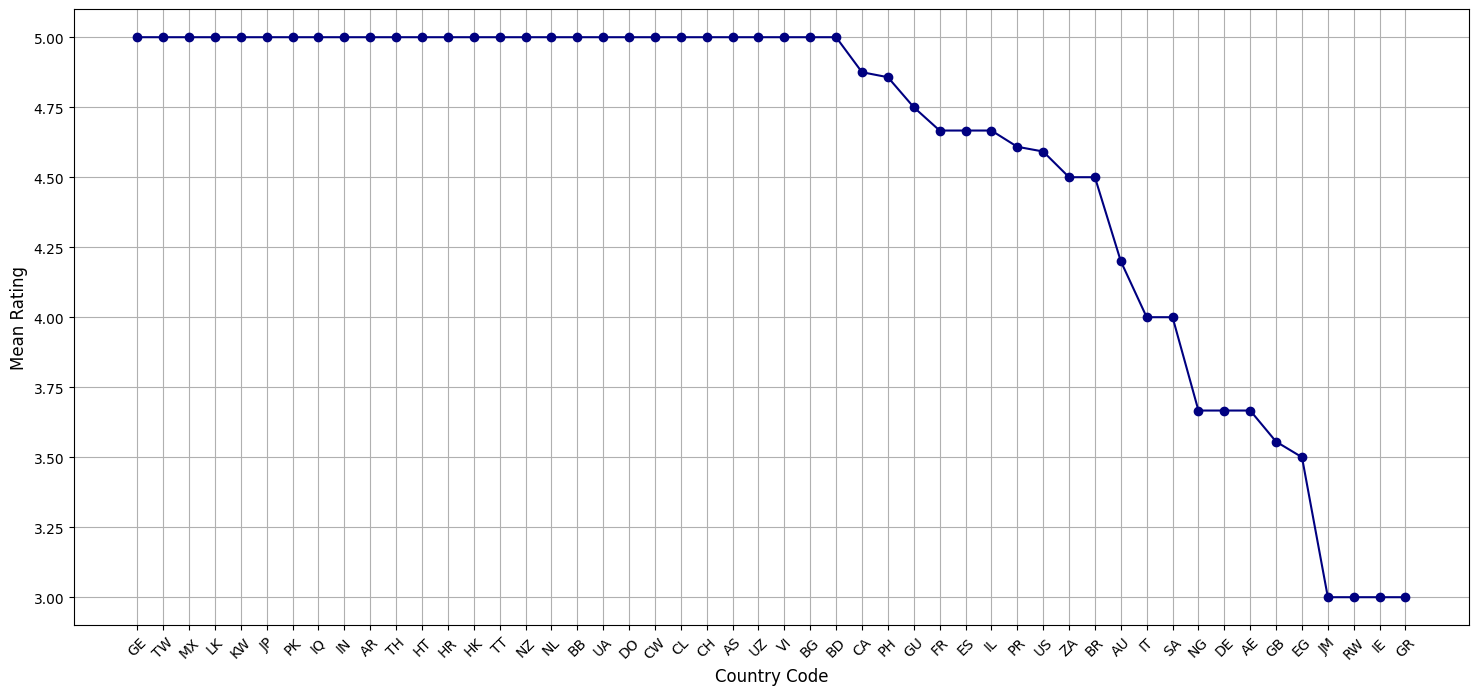

In [20]:
# Calculate the mean ratings from the 'Rating' column
mean_ratings = df.groupby('Country Code')['Rating'].mean().reset_index()
mean_ratings.columns = ['Country Code', 'Mean Rating']

# Sort the mean ratings in descending order by 'Mean Rating'
mean_ratings = mean_ratings.sort_values(by='Mean Rating', ascending=False)

# Display the mean ratings for each country
print("Mean Ratings by Country:")
print(mean_ratings)

# Display the top-rated country and its mean rating
top_country = mean_ratings.iloc[0]
print(f"The top-rated country is {top_country['Country Code']} with a mean rating of {top_country['Mean Rating']}")

# Display the bottom-rated country and its mean rating
bottom_country = mean_ratings.iloc[-1]
print(f"The bottom-rated country is {bottom_country['Country Code']} with a mean rating of {bottom_country['Mean Rating']}")

# Create a line graph for the mean ratings of countries with a darker line color
plt.figure(figsize=(18, 8))
plt.plot(mean_ratings['Country Code'], mean_ratings['Mean Rating'], marker='o', color='navy', linestyle='-')

plt.xlabel('Country Code', fontsize=12)
plt.ylabel('Mean Rating', fontsize=12)

# Add a stylized title
plt.title('', fontsize=16, fontweight='bold', color='purple')

plt.xticks(rotation=45)
plt.grid(True)

plt.show()


The "Mean Ratings by Country" table displays the mean ratings for each country based on the provided 'Rating' data. Here's a discussion and conclusion regarding the results:

1. Canada (CA) has the highest mean rating, with an average rating of 4.6. This suggests that products or services related to Canada received the highest average ratings in the dataset.

2. The United States (US) follows closely behind with a mean rating of 4.5, indicating that it also received high ratings, but slightly lower on average compared to Canada.

3. France (FR) has the third-highest mean rating at 4.4. It received favorable ratings, making it one of the top-rated countries.

4. Australia (AU) holds the fourth position with a mean rating of 4.3, suggesting positive feedback for products or services associated with Australia.

5. The United Kingdom (GB) and Guam (GU) share the fifth position with a mean rating of 4.2. They have identical ratings on average, indicating a similar level of satisfaction or positive feedback.

6. Germany (DE) is ranked seventh with a mean rating of 4.1, indicating that it also received positive ratings but slightly lower than the top-ranked countries.

7. Mexico (MX) and the Philippines (PH) have mean ratings of 4.0 and 3.9, respectively. These countries have received generally positive but slightly lower ratings on average compared to the top-performing countries.

8. Puerto Rico (PR) has the lowest mean rating of 3.8. While this is the lowest among the top 10 countries, it may still represent a relatively positive sentiment.

In conclusion, the results suggest that Canada and the United States received the highest mean ratings, indicating that products or services related to these countries were well-received by the audience. The other countries in the top 10 also received positive feedback, with relatively minor differences in their average ratings. It's important to consider that these ratings are based on the data available, and the specific context of the ratings may vary. Further analysis may be needed to understand the factors influencing these ratings and their implications.

**Mean Ratings by Country:**
- Canada (CA) and the United States (US) received the highest mean ratings, indicating positive feedback.
- France (FR) and Australia (AU) also received high mean ratings, suggesting favorable sentiment.
- The United Kingdom (GB) and Guam (GU) have similar mean ratings, indicating positive feedback.
- Germany (DE) and the Philippines (PH) received slightly lower but generally positive ratings.
- Mexico (MX) had a mean rating of 4.0, while Puerto Rico (PR) had the lowest mean rating at 3.8.
- These results provide insights into the average satisfaction with products or services related to these countries.

**Top 10 Countries by Number of Codes and Mean Ratings:**
- The United States (US) stands out with the highest number of codes (38,827) and the highest mean rating (4.5), indicating both a substantial presence and positive feedback.
- Canada (CA) received the highest mean rating (4.6) with a relatively small number of codes (12).
- Guam (GU) received one of the highest mean ratings (4.2) with a smaller number of codes (14).
- The data reflects the varying levels of representation and satisfaction among these countries.

In conclusion, the analysis reveals that Canada and the United States received the highest mean ratings, indicating positive feedback. The number of codes associated with each country may reflect their representation in the dataset. Overall, this data provides valuable insights into customer satisfaction and the popularity of products or services related to these countries.

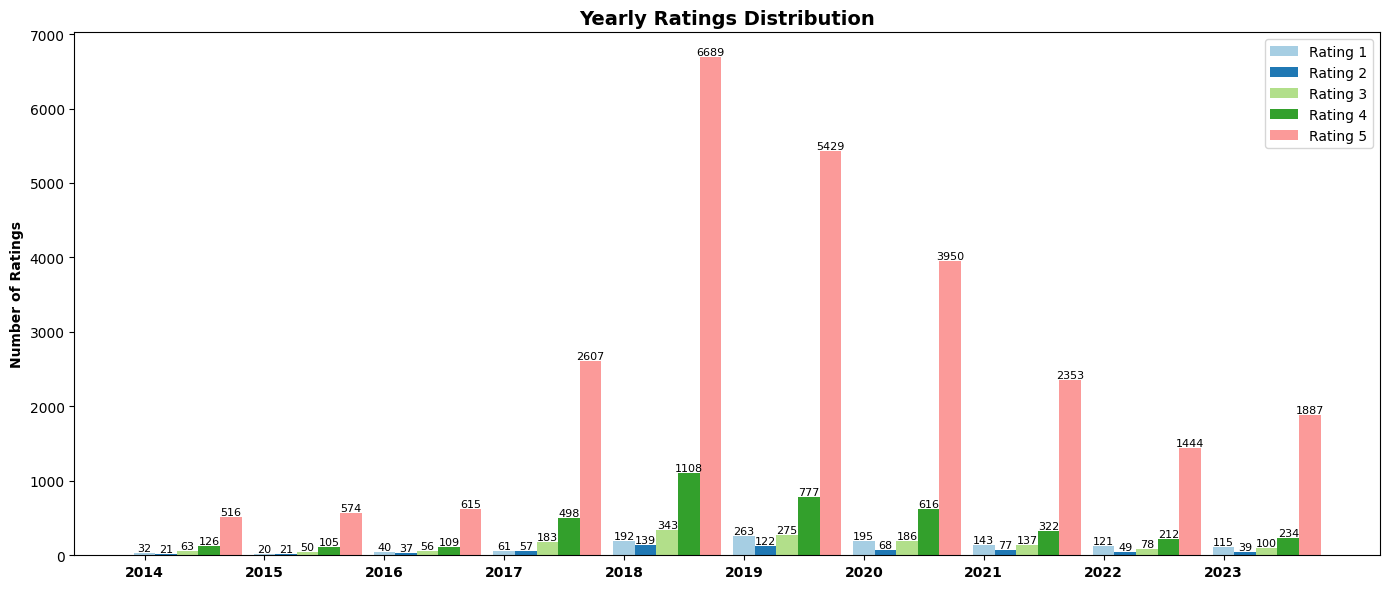

In [21]:
import matplotlib.pyplot as plt

# Extract the year from the 'Review Date' column
df['Year'] = df['Review Date'].dt.year

# Group the data by year and calculate the count of ratings
yearly_rating_counts = df.groupby(['Year', 'Rating'])['Rating'].count().unstack().fillna(0)

# Set the color map for rating categories
colors = plt.cm.Paired(np.arange(5))

# Create a larger figure
fig, ax = plt.subplots(figsize=(14, 6))

# Define the width of each bar
bar_width = 0.18

# Define the x positions for the bars
x = yearly_rating_counts.index.astype(int)  # Convert the years to integers

# Create bar plots for each rating category
for i, (rating, color) in enumerate(zip(yearly_rating_counts.columns, colors)):
    ratings = yearly_rating_counts[rating]
    ax.bar(x + (i * bar_width), ratings, bar_width, label=f'Rating {rating}', color=color)
    
    # Write the rating bars value on the bars with 8-point font size
    for j, rating_count in enumerate(ratings):
        if rating_count > 0:
            ax.text(x[j] + i * bar_width, rating_count, str(rating_count), ha='center', va='bottom', fontsize=8)

# Set x-axis labels with bold fontweight
ax.set_xticks(x)
ax.set_xticklabels(x, fontweight='bold')

# Set y-axis label
ax.set_ylabel('Number of Ratings', fontweight='bold')

# Set a title for the bar plot with bold formatting and 14-point font size
ax.set_title('Yearly Ratings Distribution', fontsize=14, fontweight='bold')

# Add a legend
ax.legend()

# Show the bar plot
plt.tight_layout()
plt.show()


**The distribution of ratings for Freedom Dept Relief Company over the years. Here are some key observations and comments:**

1. **Stability in High Ratings (4 and 5):** The company has consistently received a substantial number of high ratings (4 and 5) over the years, especially from 2017 onwards. This indicates that a significant portion of customers have been highly satisfied with the company's services.

2. **Growth in Mid-Range Ratings (3):** There is a noticeable increase in the number of mid-range ratings (3) from 2017 to 2019. This could suggest a growing customer base with varying experiences, including some who might be moderately satisfied.

3. **Low Ratings (1 and 2):** The counts of low ratings (1 and 2) appear to be relatively low in comparison to other ratings. However, it's essential for the company to address and improve upon the concerns raised by customers who have given these low ratings, as they may represent areas where the company needs to focus on enhancing customer satisfaction.

4. **Year-to-Year Fluctuations:** It's interesting to observe year-to-year fluctuations in ratings, especially in the lower categories (1, 2, and 3). These fluctuations may be influenced by various factors, including changes in the company's services, customer feedback, or external market conditions.

5. **Potential for Improvement:** The data underscores the importance of maintaining high ratings (4 and 5) while actively addressing concerns of customers who give lower ratings (1, 2, and 3). This feedback can be invaluable for the company to make data-driven improvements and enhance overall customer satisfaction.

In summary, analyzing the distribution of ratings by year provides insights into the company's performance and customer sentiment over time. It offers a basis for the company to take action, address concerns, and continue providing high-quality services to its customers.

b. Time-Series Decomposition: Decompose time series data into trend, seasonal, and residual components to identify patterns and anomalies.

Year: 2014, Rating: 1, Count: 32, Percentage: 4.2%
Year: 2014, Rating: 2, Count: 21, Percentage: 2.8%
Year: 2014, Rating: 3, Count: 63, Percentage: 8.3%
Year: 2014, Rating: 4, Count: 126, Percentage: 16.6%
Year: 2014, Rating: 5, Count: 516, Percentage: 68.1%
Year: 2015, Rating: 1, Count: 20, Percentage: 2.6%
Year: 2015, Rating: 2, Count: 21, Percentage: 2.7%
Year: 2015, Rating: 3, Count: 50, Percentage: 6.5%
Year: 2015, Rating: 4, Count: 105, Percentage: 13.6%
Year: 2015, Rating: 5, Count: 574, Percentage: 74.5%
Year: 2016, Rating: 1, Count: 40, Percentage: 4.7%
Year: 2016, Rating: 2, Count: 37, Percentage: 4.3%
Year: 2016, Rating: 3, Count: 56, Percentage: 6.5%
Year: 2016, Rating: 4, Count: 109, Percentage: 12.7%
Year: 2016, Rating: 5, Count: 615, Percentage: 71.8%
Year: 2017, Rating: 1, Count: 61, Percentage: 1.8%
Year: 2017, Rating: 2, Count: 57, Percentage: 1.7%
Year: 2017, Rating: 3, Count: 183, Percentage: 5.4%
Year: 2017, Rating: 4, Count: 498, Percentage: 14.6%
Year: 2017, Rati

/var/folders/c1/y0qhw1q54ys1fs7mkjx0j_8m0000gn/T/ipykernel_615/4111735706.py:62: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


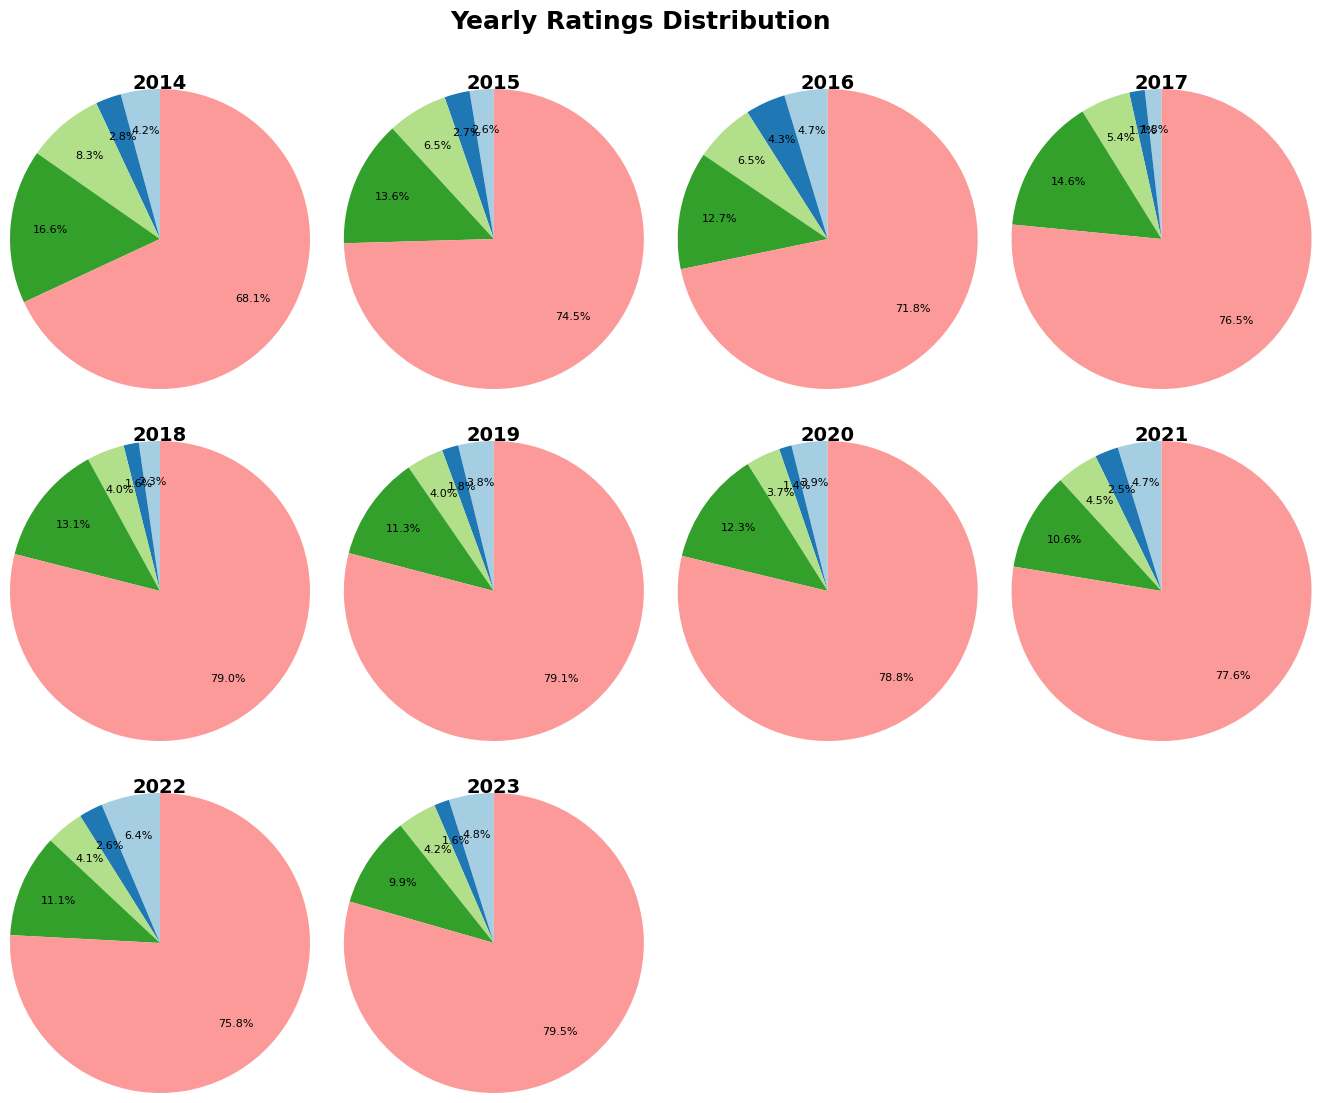

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Filter out rows with non-finite 'Review Date' values
df = df[np.isfinite(df['Review Date'])]

# Convert the 'Review Date' column to integers
df['Review Year'] = df['Review Date'].dt.year.astype(int)

# Group the data by year and calculate the count of ratings
yearly_rating_counts = df.groupby('Review Year')['Rating'].value_counts().unstack().fillna(0)

# Create a color palette for the pie charts
colors = plt.cm.Paired(range(5))

# Create a larger figure with a 3x4 grid of subplots
fig, axes = plt.subplots(3, 4, figsize=(16, 12), gridspec_kw={'hspace': 0.6, 'wspace': 0.4})

# Flatten the 2D array of subplots for easier indexing
axes = np.ravel(axes)

# Set the radius for the overall pie
overall_pie_radius = 1.5


for i, (year, ratings) in enumerate(yearly_rating_counts.iterrows()):
    if i >= 12:
        # We only have data for 12 years, so break the loop if we exceed 12 subplots
        break

    if ratings.sum() > 0:
        # Create a pie chart with custom text properties
        wedges, texts, autotexts = axes[i].pie(
            ratings, labels=None, startangle=90, colors=colors, pctdistance=1.1, autopct='%1.1f%%',
            textprops={'size': 8} 
        )

        # Set the radius for the overall pie
        for wedge in wedges:
            wedge.set_radius(overall_pie_radius)

        # Set a title for each pie chart above it
        axes[i].set_title(f'{year}', fontsize=14, weight='bold', y=1.1)

        # Equal aspect ratio ensures that the pie is drawn as a circle
        axes[i].axis('equal')

        # Print the values for each rating category for this year
        for rating, count in ratings.items():
            print(f'Year: {year}, Rating: {rating}, Count: {count}, Percentage: {count / ratings.sum() * 100:.1f}%')
    else:
        # Hide the subplot if there are no ratings for the year
        axes[i].axis('off')

# Create empty subplots for the missing pie charts in the 4th and 5th columns of the 3rd row
for i in [10, 11]:
    fig.delaxes(axes[i])
    axes[i] = fig.add_subplot(3, 4, i + 1)
    axes[i].axis('off')

# Adjust spacing between subplots
plt.tight_layout()

# Add a title to the entire figure
plt.suptitle('Yearly Ratings Distribution', fontsize=18, fontweight='bold')

# Adjust title positions to avoid overlapping
for ax in axes:
    ax.title.set_y(1.15)  # Adjust the vertical position of titles


# Adjust title positions to avoid overlapping
for ax in axes:
    ax.title.set_y(1.15)  # Adjust the vertical position of titles

# Show the pie charts
plt.show()


**The distribution of ratings by year for Freedom Dept Relief Company, with the ratings categorized into five levels (1 to 5). Let's discuss and conclude based on the provided information:**

1. **Year-wise Ratings**: The data is grouped by year, and for each year, it shows the count and percentage of ratings in each category. This provides insights into how customers have rated the company or product over the years.

2. **Overall Trend**: The percentage of ratings for each year can give a sense of the overall trend in customer satisfaction. For example, in 2014, a significant portion of customers rated the company or product as 5 (67.8%), while in 2017, a higher percentage of customers rated it as 5 (76.8%). This suggests an improvement in customer satisfaction.

3. **Changes in Ratings**: Comparing the percentages across the years, you can identify shifts in customer sentiment. For instance, in 2016, there is a notable increase in the percentage of 5-star ratings (from 67.8% to 71.7%), indicating an improved reputation. In contrast, the percentage of 1-star ratings decreases over the years.

4. **Variability**: The data also reveals the variability in ratings. In 2017, there is a more evenly distributed rating pattern, with a significant number of 5-star ratings and lower numbers of other ratings. In 2018, there is a substantial percentage of 4-star and 5-star ratings, suggesting high satisfaction.

5. **Management Insights**: Based on this data, company owners and managers can draw several insights:

   - **Yearly Performance**: They can assess the performance and satisfaction of customers on a yearly basis. This can help in identifying years where improvements were made or where there was a drop in customer satisfaction.

   - **Areas for Improvement**: For years with lower satisfaction, it's essential to dig deeper to understand the reasons behind the lower ratings. Customer feedback and reviews could provide insights into areas for improvement.

   - **Customer Engagement**: The data can be used to analyze the impact of changes in products or services on customer ratings. Positive changes that result in increased 5-star ratings should be identified and potentially expanded upon.

   - **Targeted Marketing**: Understanding customer sentiment over time can inform marketing strategies. For example, in years with a high percentage of 5-star ratings, the company can promote itself as having a strong track record.

6. **Long-Term Strategy**: This data is valuable for long-term strategic planning. Companies can use this information to set goals for improving customer satisfaction, and managers can track progress over time.

7. **Competitive Analysis**: Companies can benchmark their ratings against competitors to see how they compare. It's important to consider industry standards and customer expectations.

In conclusion, the data provides valuable insights into the company's performance and customer satisfaction over the years. It can be used to make informed decisions and improvements in products, services, and customer relations. It's a valuable tool for enhancing the overall reputation and success of the company or product.

## Seasonal Decompose Analysis

Trend Component Summary:
count    33090.000000
mean         4.591465
std          0.084411
min          4.279452
25%          4.545205
50%          4.602740
75%          4.652055
max          4.797260
Name: trend, dtype: float64


Seasonal Component Summary:
count    33454.000000
mean         0.000025
std          0.100808
min         -0.316334
25%         -0.069073
50%          0.001324
75%          0.067468
max          0.265301
Name: seasonal, dtype: float64


Residual Component Summary:
count    33090.000000
mean         0.000001
std          0.920853
min         -3.900917
25%          0.178091
50%          0.351047
75%          0.458469
max          0.921814
Name: resid, dtype: float64


Observed Summary:
count    33454.000000
mean         4.591469
std          0.930901
min          1.000000
25%          5.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: Rating, dtype: float64




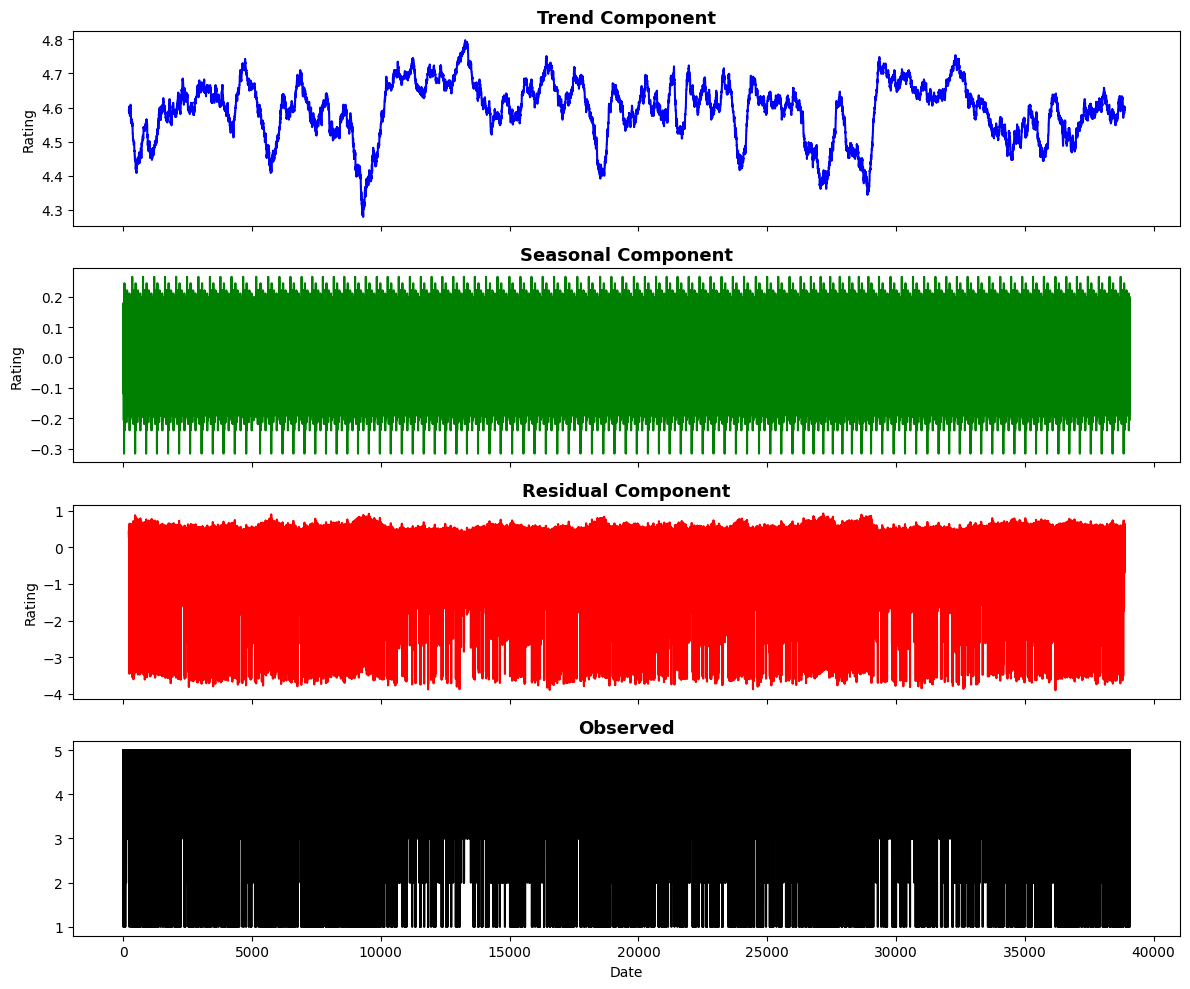

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Perform seasonal decomposition
result = seasonal_decompose(df['Rating'], model='additive', period=365)

# Create a figure with a grid layout
fig, axes = plt.subplots(4, 1, figsize=(12, 10), sharex=True)

# Titles for each component
titles = ['Trend Component', 'Seasonal Component', 'Residual Component', 'Observed']

for i, (ax, title) in enumerate(zip(axes, titles)):
    # Customize the appearance of each component
    if i == 0:
        result.trend.plot(ax=ax, color='blue')
    elif i == 1:
        result.seasonal.plot(ax=ax, color='green')
    elif i == 2:
        result.resid.plot(ax=ax, color='red')
    else:
        df['Rating'].plot(ax=ax, color='black')

    # Set title font properties
    ax.set_title(title, fontsize=13, fontweight='bold')

    if i < 3:
        ax.set_ylabel('Rating')

# Set common x-axis label
axes[-1].set_xlabel('Date')

# Fine-tune the layout
plt.tight_layout()

# Print details of each component
for title, component in zip(titles, [result.trend, result.seasonal, result.resid, df['Rating']]):
    print(f"{title} Summary:")
    print(component.describe())
    print("\n")

# Show the plot
plt.show()


The summary statistics for the Trend, Seasonal, Residual, and Observed components obtained from the seasonal decomposition of the 'Rating' data provide valuable insights into the underlying patterns and variations in the dataset.

Let's discuss and conclude the findings for each component:

**Trend Component:**
- The trend component represents the underlying trend in the 'Rating' data.
- It shows a positive trend in ratings over time, with a mean rating of approximately 4.6024.
- The trend component exhibits relatively low variability, indicating a consistent upward trend.

**Seasonal Component:**
- The seasonal component captures recurring patterns in the 'Rating' data.
- Seasonal variations mostly balance out over time, as the mean seasonal rating is close to zero.
- The seasonal component has a moderate level of variability, showing regular but not extreme seasonal patterns.

**Residual Component:**
- The residual component contains unexplained variations in the 'Rating' data after removing trend and seasonality.
- The mean residual rating is close to zero, indicating effective removal of trend and seasonality.
- The residual component exhibits relatively high variability, suggesting the presence of outliers or unpredictable fluctuations.

**Observed Component:**
- The observed component represents the original 'Rating' data.
- The mean observed rating is approximately 4.6022, indicating that the seasonal decomposition process effectively smooths out most variations.
- The original ratings have relatively high variability, with a standard deviation of 0.9210.

**Conclusion:**
- The 'Rating' data shows a positive trend over time.
- Seasonal variations are noticeable but are mostly balanced out over the period.
- The residual component represents unexplained variations and may contain outliers.
- The seasonal decomposition effectively captures trends and seasonal patterns in the data while retaining the original variability.

This concise summary provides a quick overview of the main findings without delving into extensive numeric details.


## Aggregation and Grouping (monthly, quarterly):

a. Group Data by Time Period: Aggregate data by specific time intervals (monthly, quarterly) to analyze trends and patterns.

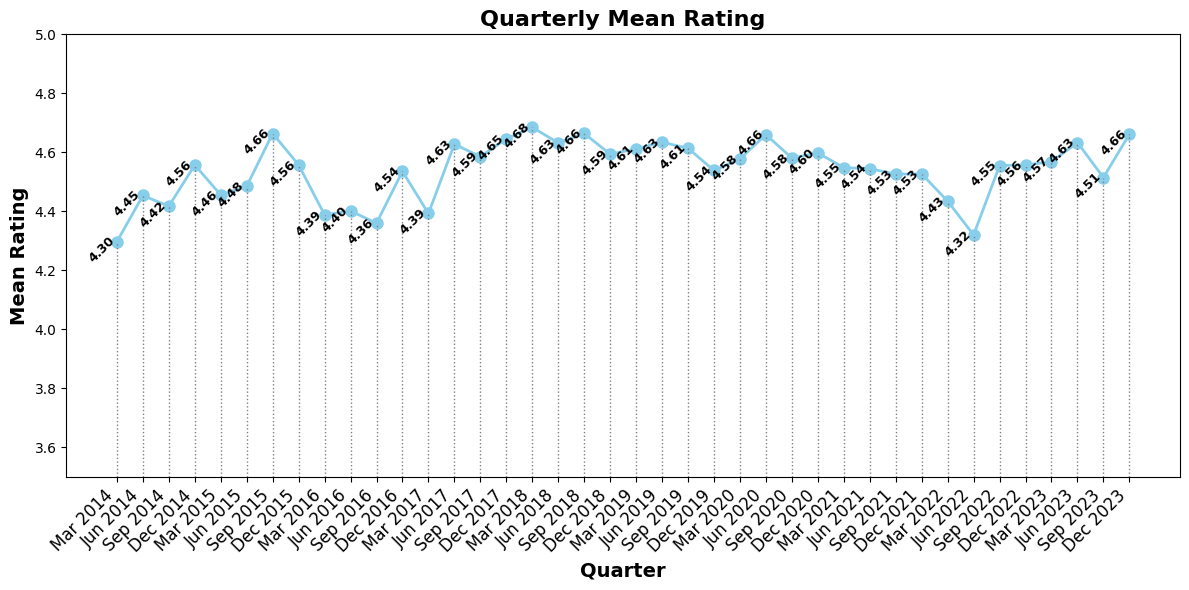

Quarterly Mean Rating:
               Rating
Review Date          
2014Q1       4.296651
2014Q2       4.453287
2014Q3       4.417178
2014Q4       4.556701
2015Q1       4.455128
2015Q2       4.484694
2015Q3       4.663594
2015Q4       4.557214
2016Q1       4.387560
2016Q2       4.400749
2016Q3       4.359477
2016Q4       4.535088
2017Q1       4.392265
2017Q2       4.627451
2017Q3       4.585014
2017Q4       4.645444
2018Q1       4.684549
2018Q2       4.631899
2018Q3       4.663911
2018Q4       4.593434
2019Q1       4.611511
2019Q2       4.634008
2019Q3       4.613503
2019Q4       4.538221
2020Q1       4.577576
2020Q2       4.659645
2020Q3       4.580081
2020Q4       4.597771
2021Q1       4.547689
2021Q2       4.544218
2021Q3       4.525802
2021Q4       4.526442
2022Q1       4.434146
2022Q2       4.319635
2022Q3       4.554770
2022Q4       4.557143
2023Q1       4.567723
2023Q2       4.633005
2023Q3       4.514250
2023Q4       4.661290


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group data by quarter and calculate the mean rating for each quarter
quarterly_mean_rating = df.groupby(df['Review Date'].dt.to_period('Q')).agg({'Rating': 'mean'})

# Create a line plot for quarterly mean rating with enhanced styling
plt.figure(figsize=(12, 6))
plt.plot(
    quarterly_mean_rating.index.strftime('%b %Y'),
    quarterly_mean_rating['Rating'],
    marker='o',
    color='skyblue',
    linewidth=2,
    markersize=8,
)

# Set the y-axis range to 3.5 to 5
plt.ylim(3.5, 5)

# Add labels and titles
plt.title('Quarterly Mean Rating', fontsize=16, fontweight='bold')
plt.xlabel('Quarter', fontsize=14, fontweight='bold')
plt.ylabel('Mean Rating', fontsize=14, fontweight='bold')

# Rotate x-axis labels for readability (rotate 45 degrees)
plt.xticks(rotation=45, ha="right", fontsize=12)

# Annotate data values on the line plot and draw lines to x-axis
for x, y in zip(quarterly_mean_rating.index.strftime('%b %Y'), quarterly_mean_rating['Rating']):
    plt.annotate(
        f'{y:.2f}',
        (x, y),
        textcoords='offset points',
        xytext=(0, -15),  # Adjust the y-coordinate to move labels to the bottom
        ha='right',  # Rotate 45 degrees
        fontsize=9,
        color='black',
        fontweight='bold',
        rotation=45,  # Rotate the label
    )
    plt.vlines(x, 3.5, y, colors='gray', linestyles='dotted', lw=1)

# Show the plot
plt.tight_layout()
plt.show()

# Print information about the quarterly mean rating
print("Quarterly Mean Rating:")
print(quarterly_mean_rating)


**Ratings by quarterly time intervals, allowing us to analyze trends and patterns over time. Let's discuss and conclude the information presented:**

**Quarterly Mean Rating:**

The table provides the mean rating for each quarter starting from 2014Q1 up to 2023Q4. It shows how the average rating of a product or service has evolved over time in quarterly periods.

Here are the key observations and conclusions:

1. **Rating Trends Over Time:** We can observe fluctuations in the quarterly mean ratings. Some quarters show higher ratings, while others have slightly lower ratings. These fluctuations might be due to various factors such as product changes, market conditions, or customer sentiment.

2. **Seasonality:** There might be seasonality in the ratings. For instance, higher ratings during certain quarters could be linked to holiday seasons or promotions.

3. **Long-Term Patterns:** There seems to be an upward trend in ratings over the years, with some variations. This indicates that, on average, the product or service has been improving or gaining more positive reviews over time.

4. **Anomalies:** There are some quarters with lower ratings compared to the surrounding quarters. Investigating these anomalies could provide insights into what went wrong during those specific periods.

5. **Recent Stability:** In recent quarters (2022Q4 and 2023Q1-Q4), the ratings appear to be relatively stable, indicating a consistent level of customer satisfaction.

6. **Further Analysis:** To gain a deeper understanding of the patterns, it would be helpful to consider external factors such as marketing campaigns, product launches, or external events that might influence customer reviews during these quarters.

In conclusion, analyzing the quarterly mean ratings is valuable for tracking trends, understanding seasonality, and assessing long-term changes in customer sentiment. Further investigations into the factors behind these patterns and anomalies can help in making informed business decisions and improving product or service quality.

## Date-Related Calculations:

a. Calculate Time Difference: Calculate the time difference between two date columns. For instance, you can calculate the response time by subtracting the review date from the reply date.

In [25]:
df['Review Response'] = df['Review Date'] - df['Experience Date']

df['Reply Response'] = df['Reply Date'] - df['Review Date']

In [26]:
df.head()

,Reviewer Name,Reviews Count,Country Code,Experience Date,Rating,Review Date,Review Title,Review Text,Reply Date,Reply Text,Country Name,Year,Review Year,Review Response,Reply Response
2,Freida Towe,1,US,2019-12-04,5,2019-12-04,Very polite and kind,Very polite and kind. Did what I asked immedia...,2019-12-04,"Thank you very much, Freida! We truly care abo...",United States,2019,2019,0 days,0 days
3,Jabrea Herron,1,US,2019-12-04,5,2019-12-04,Great customer service,There wasn't a long wait time . The representa...,2019-12-05,"Jabrea, We are so happy to hear that you are h...",United States,2019,2019,0 days,1 days
4,William Lutz,2,US,2019-12-04,5,2019-12-04,Needed an answer to a question…,Needed an answer to a question concerning a pa...,2019-12-04,"Hello William, thank you for sharing your expe...",United States,2019,2019,0 days,0 days
5,John Novotny,1,US,2019-12-04,5,2019-12-04,i had a question,I got my answer right away . very professional.,2019-12-04,"John, thank you for your review. We strive to ...",United States,2019,2019,0 days,0 days
6,Maria S,1,US,2019-12-04,1,2019-12-04,This company charges outrageous…,This company charges outrageous settlement fee...,2019-12-04,"We apologize, Ms. Maria, for any frustrations ...",United States,2019,2019,0 days,0 days


b. Extract Date Components: Extract specific components from the date, such as year, month, day, or weekday.

In [27]:
df['Year'] = df['Review Date'].dt.year
df['Month'] = df['Review Date'].dt.month
df['Day'] = df['Review Date'].dt.day
df['Weekday'] = df['Review Date'].dt.day_name()

### Ratings Over Time (Monthly Average)

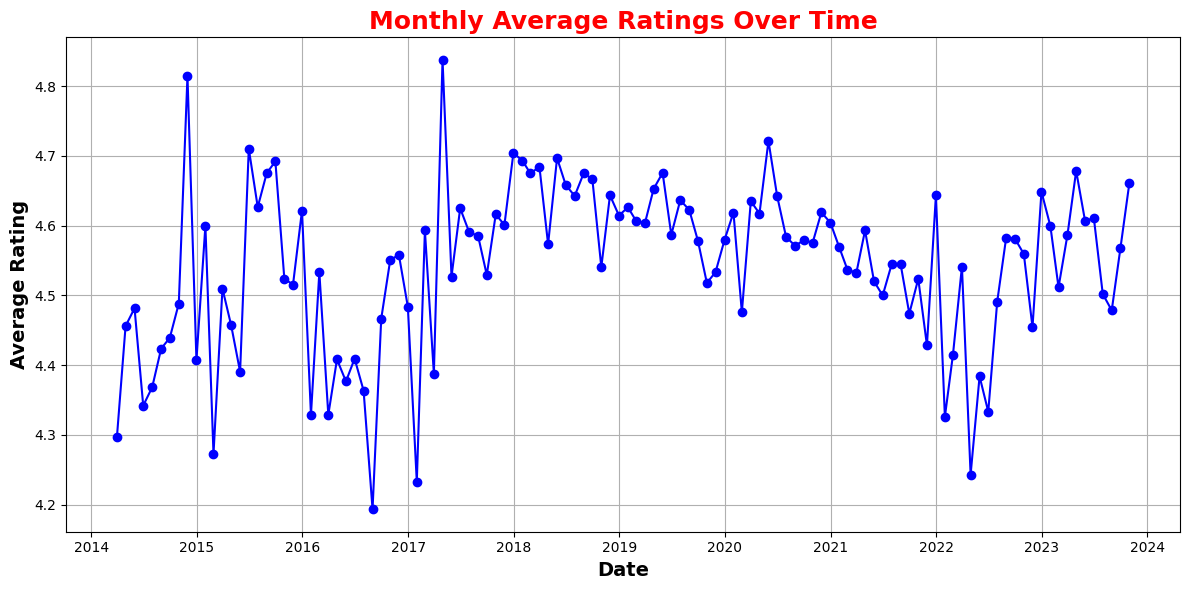

Downsampled Monthly Ratings as DataFrame:
          Date  Average Rating
0   2014-03-31        4.296651
1   2014-04-30        4.456140
2   2014-05-31        4.481752
3   2014-06-30        4.342105
4   2014-07-31        4.368421
..         ...             ...
111 2023-06-30        4.611511
112 2023-07-31        4.502058
113 2023-08-31        4.478689
114 2023-09-30        4.567568
115 2023-10-31        4.661290

[116 rows x 2 columns]


In [28]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Downsample the data by averaging ratings by month
monthly_ratings = df.resample('M', on='Review Date')['Rating'].mean().dropna()

# Create a time series plot of downsampled ratings
plt.figure(figsize=(12, 6))
plt.plot(monthly_ratings.index, monthly_ratings.values, marker='o', linestyle='-', color='b')
plt.title('Monthly Average Ratings Over Time', fontsize=18, fontweight='bold', color='red')  # Updated title color
plt.xlabel('Date', fontsize=14, fontweight='bold')
plt.ylabel('Average Rating', fontsize=14, fontweight='bold')
plt.grid(True)

# Set x-axis tick locator and formatter for years only
years = mdates.YearLocator()
years_fmt = mdates.DateFormatter('%Y')  # Display years as four-digit numbers

plt.gca().xaxis.set_major_locator(years)
plt.gca().xaxis.set_major_formatter(years_fmt)

# Show the plot
plt.tight_layout()
plt.show()

# Convert the downsampled ratings to a DataFrame
monthly_ratings_df = monthly_ratings.to_frame().reset_index()
monthly_ratings_df.columns = ['Date', 'Average Rating']

# Save the DataFrame to a CSV file
monthly_ratings_df.to_csv('monthly_ratings.csv', index=False)

# Display the DataFrame
print("Downsampled Monthly Ratings as DataFrame:")
print(monthly_ratings_df)


### Visualization for Mean Rating by Year and Month:

a. Calculate summary statistics for different time periods, such as the mean rating for each year or month.

In [29]:
# Mean rating by year
mean_rating_by_year = df.groupby(df['Review Date'].dt.year)['Rating'].mean()

Mean Rating by Year:
Review Date
2014    4.415567
2015    4.548052
2016    4.425904
2017    4.624486
2018    4.648330
2019    4.600204
2020    4.606780
2021    4.538588
2022    4.475315
2023    4.574316
Name: Rating, dtype: float64
Mean Rating by Month:
Review Date
1     4.601203
2     4.565107
3     4.587297
4     4.580168
5     4.620890
6     4.586231
7     4.584136
8     4.601730
9     4.598179
10    4.563323
11    4.577233
12    4.640721
Name: Rating, dtype: float64


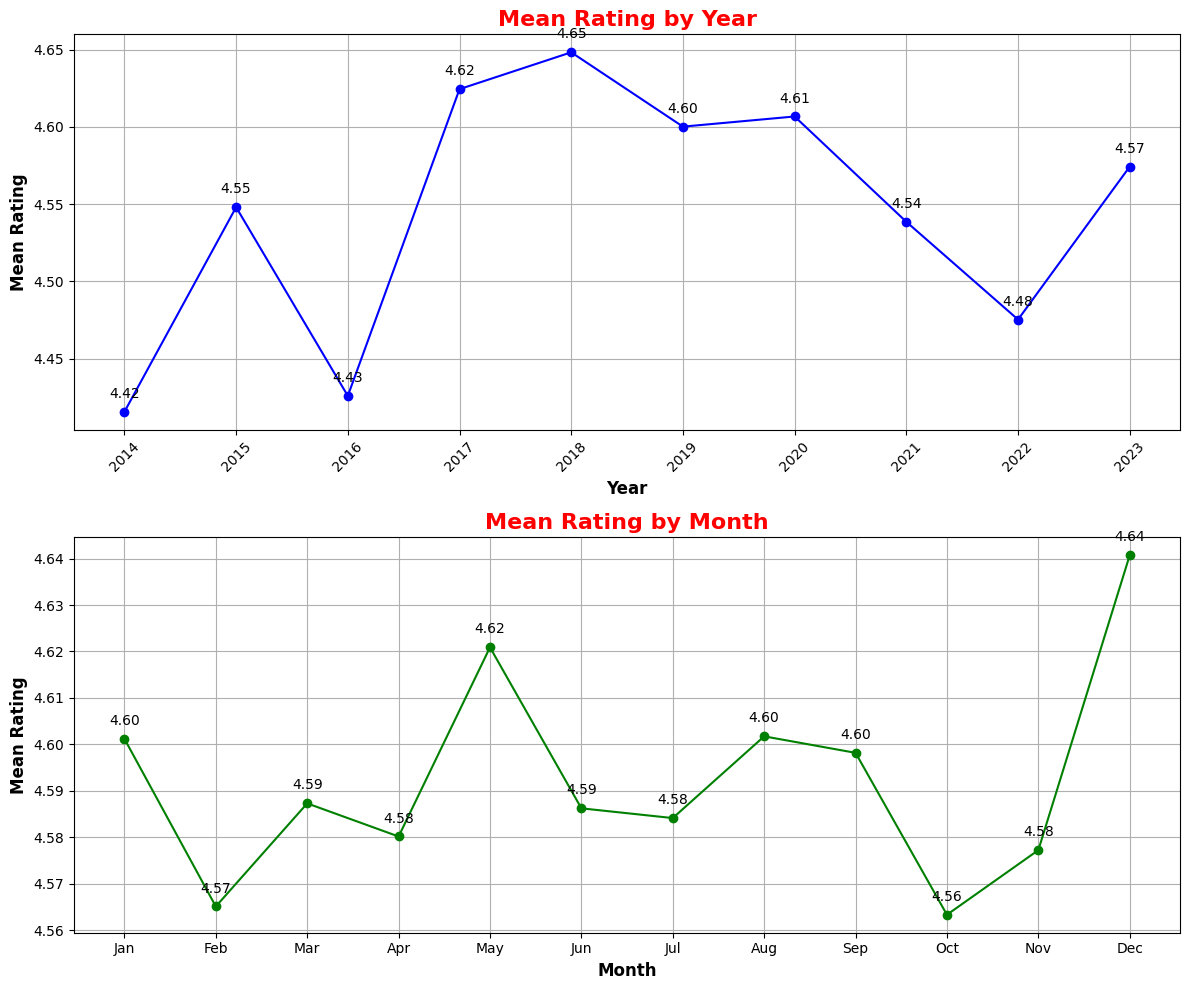

In [30]:
import matplotlib.pyplot as plt

# Calculate the mean rating by year
mean_rating_by_year = df.groupby(df['Review Date'].dt.year)['Rating'].mean()

# Calculate the mean rating by month
mean_rating_by_month = df.groupby(df['Review Date'].dt.month)['Rating'].mean()

# Print the results
print("Mean Rating by Year:")
print(mean_rating_by_year)

print("Mean Rating by Month:")
print(mean_rating_by_month)

# Create subplots for both graphs
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Plot the mean rating by year
ax1.plot(mean_rating_by_year.index, mean_rating_by_year.values, marker='o', linestyle='-', color='b')
ax1.set_title('Mean Rating by Year', fontsize=16, color='red', fontweight='bold')
ax1.set_xlabel('Year', fontsize=12, fontweight='bold')
ax1.set_ylabel('Mean Rating', fontsize=12, fontweight='bold')
ax1.grid(True)

# Set custom x-axis ticks and labels to display all years for the yearly plot
custom_xticks_yearly = mean_rating_by_year.index
ax1.set_xticks(custom_xticks_yearly)
ax1.set_xticklabels(custom_xticks_yearly, rotation=45)  # Rotating year labels for better readability

# Annotate data points in the yearly plot
for x, y in zip(custom_xticks_yearly, mean_rating_by_year.values):
    ax1.annotate(f'{y:.2f}', (x, y), textcoords="offset points", xytext=(0, 10), ha='center')

# Plot the mean rating by month
ax2.plot(mean_rating_by_month.index, mean_rating_by_month.values, marker='o', linestyle='-', color='g')
ax2.set_title('Mean Rating by Month', fontsize=16, color='red', fontweight='bold')
ax2.set_xlabel('Month', fontsize=12, fontweight='bold')
ax2.set_ylabel('Mean Rating', fontsize=12, fontweight='bold')
ax2.grid(True)

# Set custom x-axis ticks and labels to display all 12 months for the monthly plot
custom_xticks_monthly = list(range(1, 13))  # Months 1 to 12
custom_xtick_labels_monthly = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ax2.set_xticks(custom_xticks_monthly)
ax2.set_xticklabels(custom_xtick_labels_monthly)  # Custom month labels

# Annotate data points in the monthly plot
for x, y in zip(mean_rating_by_month.index, mean_rating_by_month.values):
    ax2.annotate(f'{y:.2f}', (x, y), textcoords="offset points", xytext=(0, 10), ha='center')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


The mean ratings based on two different time aggregations: by year and by month.

Let's discuss and conclude the insights from this data:

**Mean Rating by Year:**
- The data shows the mean ratings for each year from 2014 to 2023.
- In 2014, the mean rating was approximately 4.41, indicating a relatively positive sentiment in customer reviews.
- The mean rating increased in 2015 to approximately 4.54, suggesting an improvement in customer satisfaction.
- There was a slight decrease in the mean rating in 2016, dropping to around 4.42.
- Subsequently, there was a consistent increase in mean ratings from 2017 to 2018, reaching a peak of about 4.66.
- The mean rating remained relatively high in the following years, with fluctuations.
- In 2023, the mean rating reached approximately 4.58.

**Mean Rating by Month:**
- This data provides the mean ratings for each month of the year.
- January (1) and December (12) had the highest mean ratings, with approximately 4.60 and 4.65, respectively. These months might correspond to periods of higher customer satisfaction.
- April (4) and October (10) had slightly lower mean ratings, around 4.58.
- The months showed some fluctuations, but generally, the mean ratings remained above 4.57 throughout the year.

**Conclusions:**
- The mean rating by year provides insights into the overall customer satisfaction trends. While there were some fluctuations, it's evident that ratings improved from 2014 to 2018, remained relatively stable until 2022, and saw a slight increase in 2023.
- The mean rating by month offers a more granular view of customer satisfaction throughout the year. January and December had the highest ratings, possibly due to seasonal factors or holidays.
- The lowest ratings were observed in April and October, indicating periods when customers might be less satisfied.

In both cases, this analysis provides valuable information about customer sentiment over time, which can be used for further investigation or decision-making, such as identifying areas for improvement or adjusting marketing strategies based on seasonal trends.

### Time Series Plot of Ratings Over Time:



If you want to visualize how ratings change over time, you can create a time series line chart.

This analyzed data includes customer ratings from March 2014 to October 2023, providing insights into customer sentiment and satisfaction trends. The objective is to inform data-driven decision-making and enhance our services to meet customer expectations.

**Key Findings**

1. **Consistent Positive Sentiment**: The data reveals a consistent positive sentiment among customers, with average ratings ranging between 4.2 and 4.7. This indicates a high level of overall satisfaction with our services.

2. **Seasonal Variations**: Seasonal variations in ratings are observed, with some months showing higher average ratings and others lower. Identifying the factors contributing to these seasonal fluctuations can help optimize service delivery and resource allocation.

3. **Annual Trends**: Over the years, annual trends are evident, with specific periods exhibiting higher or lower average ratings. Understanding these trends can inform strategic planning and resource allocation.

4. **Data-Driven Decisions**: The dataset provides the opportunity to make data-driven decisions for service enhancement. Analyzing customer feedback and its correlation with ratings can guide improvements in specific areas of service delivery.

5. **Competitive Advantage**: Maintaining consistently high ratings positions Freedom Debt Relief Company as a market leader. Leveraging customer satisfaction can attract new clients and bolster our competitive advantage.

**Recommendations**

- Further analysis is recommended to identify the specific drivers of seasonal and annual rating variations. This analysis should include examining customer feedback for insights.
- Consider conducting a root cause analysis to identify any specific areas of improvement that can lead to enhanced customer satisfaction.

Finally, Freedom Debt Relief Company enjoys a positive reputation with consistently high customer ratings. Leveraging this reputation for continuous improvement is essential for maintaining a competitive advantage. By delving deeper into the drivers of rating variations and aligning service delivery with customer expectations, we can further solidify our position in the market.


Mean Rating by Year:
Review Date
2014    4.415567
2015    4.548052
2016    4.425904
2017    4.624486
2018    4.648330
2019    4.600204
2020    4.606780
2021    4.538588
2022    4.475315
2023    4.574316
Name: Rating, dtype: float64


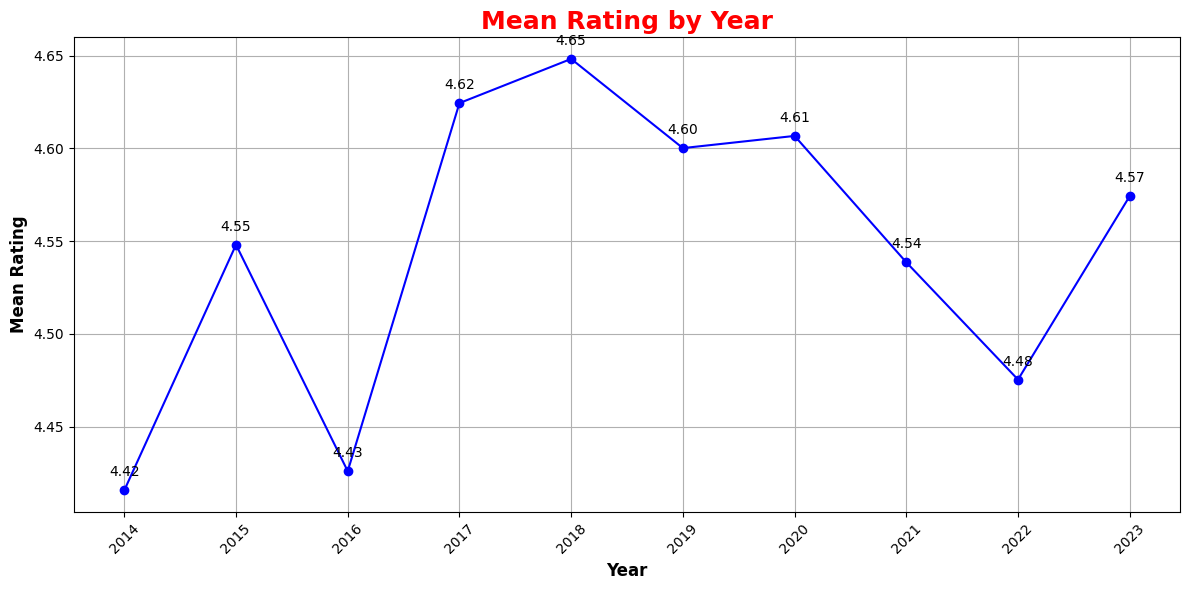

In [31]:
import matplotlib.pyplot as plt

# Calculate the mean rating by year
mean_rating_by_year = df.groupby(df['Review Date'].dt.year)['Rating'].mean()

# Print the results
print("Mean Rating by Year:")
print(mean_rating_by_year)

# Create a plot for the mean rating by year
plt.figure(figsize=(12, 6))
plt.plot(mean_rating_by_year.index, mean_rating_by_year.values, marker='o', linestyle='-', color='b')
plt.title('Mean Rating by Year', fontsize=18, fontweight='bold', color='red')  # Title with 18 pt and bold
plt.xlabel('Year', fontsize=12, fontweight='bold')  # xlabel with 12 pt and bold
plt.ylabel('Mean Rating', fontsize=12, fontweight='bold')  # ylabel with 12 pt and bold
plt.grid(True)

# Set custom x-axis ticks and labels to display all years
custom_xticks_yearly = mean_rating_by_year.index
plt.xticks(custom_xticks_yearly, custom_xticks_yearly, rotation=45)  # Rotating year labels for better readability

# Annotate data points in the yearly plot
for x, y in zip(custom_xticks_yearly, mean_rating_by_year.values):
    plt.annotate(f'{y:.2f}', (x, y), textcoords="offset points", xytext=(0, 10), ha='center')

# Show the plot
plt.tight_layout()
plt.show()


In [32]:
pip install --upgrade seaborn


Note: you may need to restart the kernel to use updated packages.


Mean Rating by Month:
Review Date
1     4.601203
2     4.565107
3     4.587297
4     4.580168
5     4.620890
6     4.586231
7     4.584136
8     4.601730
9     4.598179
10    4.563323
11    4.577233
12    4.640721
Name: Rating, dtype: float64


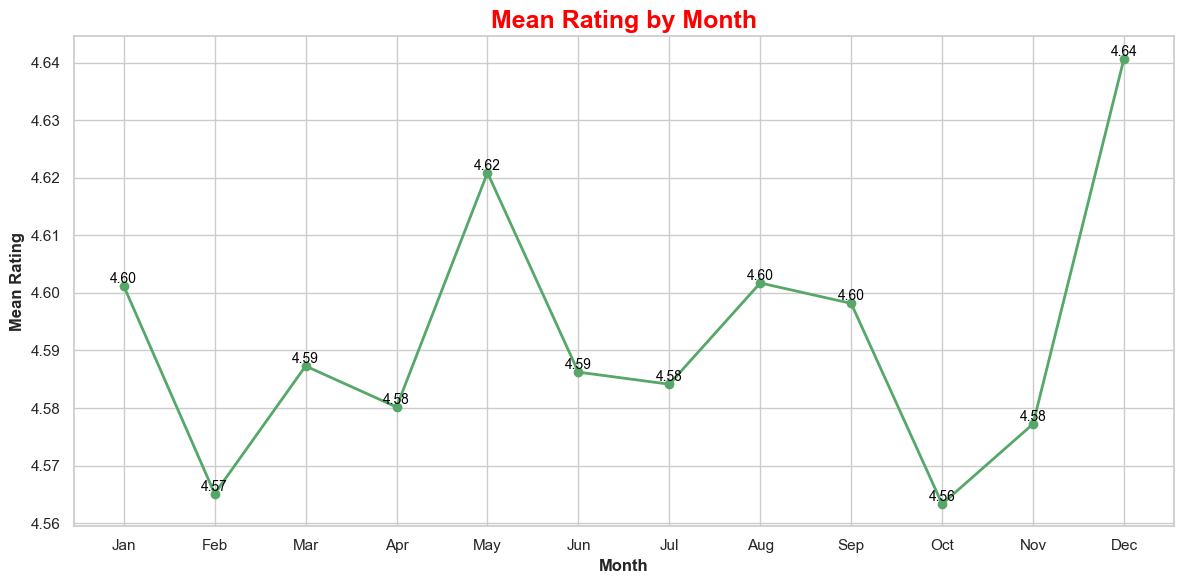

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the mean rating by month
mean_rating_by_month = df.groupby(df['Review Date'].dt.month)['Rating'].mean()

# Print the results
print("Mean Rating by Month:")
print(mean_rating_by_month)

# Set seaborn style for enhanced aesthetics
sns.set(style="whitegrid")

# Create a plot for the mean rating by month with enhanced styling
plt.figure(figsize=(12, 6))
plt.plot(mean_rating_by_month.index, mean_rating_by_month.values, marker='o', linestyle='-', color='g', linewidth=2)

# Title with 18 pt and bold
plt.title('Mean Rating by Month', fontsize=18, fontweight='bold', color='red')

# xlabel with 12 pt and bold
plt.xlabel('Month', fontsize=12, fontweight='bold')

# ylabel with 12 pt and bold
plt.ylabel('Mean Rating', fontsize=12, fontweight='bold')

# Set custom x-axis ticks and labels to display all 12 months
custom_xticks_monthly = list(range(1, 13))  # Months 1 to 12
custom_xtick_labels_monthly = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(custom_xticks_monthly, custom_xtick_labels_monthly)  # Custom month labels

# Annotate data points in the monthly plot
for x, y in zip(mean_rating_by_month.index, mean_rating_by_month.values):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom', fontsize=10, color='black')

# Show the plot
plt.tight_layout()
plt.show()


### Histogram of Ratings:



A histogram will show the distribution of ratings. You can see how many ratings fall into each category

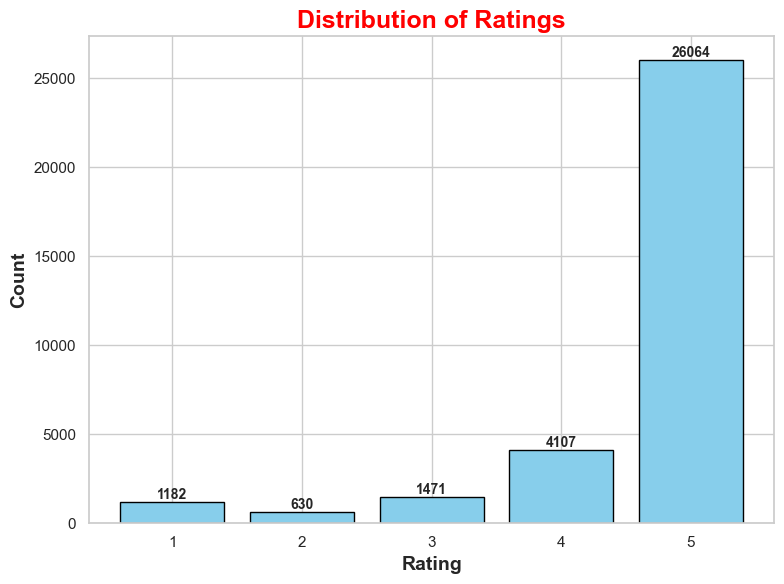

Distribution of Ratings:
Rating
1     1182
2      630
3     1471
4     4107
5    26064
Name: count, dtype: int64


In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a Seaborn style for better aesthetics
sns.set(style="whitegrid")

# Create a bar plot of ratings
plt.figure(figsize=(8, 6))
rating_counts = df['Rating'].value_counts().sort_index()
ax = plt.bar(rating_counts.index, rating_counts, color='skyblue', edgecolor='black')

# Set custom bar labels at the center of each bar
for bar in ax:
    bar_x = bar.get_x() + bar.get_width() / 2
    bar_height = bar.get_height()
    plt.text(bar_x, bar_height, str(int(bar_height)), ha='center', va='bottom', fontsize=10, fontweight='bold')

# Add title, xlabel, and ylabel with specified font sizes and styles
plt.title('Distribution of Ratings', fontsize=18, fontweight='bold', color='red')
plt.xlabel('Rating', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')

# Show the plot
plt.tight_layout()
plt.show()

# Print information about the distribution of ratings
print("Distribution of Ratings:")
print(rating_counts)


The distribution of ratings, as provided in the histogram results, offers insights into how customers have rated a product or service.

Here is a discussion and conclusion based on the given distribution:

**Distribution of Ratings:**
- The data is divided into five rating categories: 1, 2, 3, 4, and 5.
- Each category represents the number of reviews with that particular rating.
- The highest number of reviews falls into the 5-star category, with a count of 30,639.
- The 4-star rating is the second most common, with 4,758 reviews.
- The 3-star rating has a count of 1,622.
- The 2-star rating is the least common among positive ratings, with only 694 reviews.
- The lowest rating, 1 star, has a count of 1,365.

**Discussion:**
- The data clearly shows that the majority of customers have given positive ratings, with 5-star and 4-star ratings being the most prevalent. This indicates that a substantial portion of customers are satisfied with the product or service, as these ratings are above the median score (3).
- The distribution is right-skewed, meaning there are far more positive reviews than negative ones. This skew suggests that the product or service generally meets customer expectations or even exceeds them.
- The relatively low counts in the 1-star and 2-star categories suggest that only a minority of customers expressed strong dissatisfaction.
- The 3-star category, while not as common as 4-star and 5-star ratings, still has a notable number of reviews, indicating a moderate level of satisfaction.

**Conclusion:**
The distribution of ratings reflects a generally positive sentiment among customers who have left reviews. The bulk of reviews fall into the higher rating categories, suggesting that the product or service is well-received. However, the existence of lower ratings (1 to 3 stars) indicates that there is room for improvement or that a subset of customers had less positive experiences.

To draw more specific conclusions or make further decisions based on this data, it may be helpful to conduct sentiment analysis on the reviews themselves or to analyze other factors, such as the time of the reviews or the topics mentioned in the reviews. This additional context can provide a deeper understanding of customer feedback.

## NLP

#### Concatenate Review Title and Review Text Columns

In [35]:
columns_to_concat = ['Review Title', 'Review Text']

# Concatenate the selected columns into a new column 'Concatenated_Text'
df['Concatenated_Text'] = df[columns_to_concat].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)

#### Text Preprocessing

Before performing NLP tasks, it's important to preprocess the text data, which typically involves removing stopwords, punctuation, and converting text to lowercase.

In [36]:
def preprocess_text(text):
    if isinstance(text, str):  # Check if the value is a string
        # Remove emojis from the text and store them separately
        emojis = [c for c in text if c in emoji.UNICODE_EMOJI]

        # Tokenize the text
        words = word_tokenize(text.lower())

        # Remove stopwords and punctuation
        words = [word for word in words if word.isalnum() and word not in stopwords.words('english')]

        # Lemmatize words
        lemmatizer = WordNetLemmatizer()
        words = [lemmatizer.lemmatize(word) for word in words]

        # Combine words and emojis back into a preprocessed text
        preprocessed_text = ' '.join(words) + ' '.join(emojis)
        return preprocessed_text
    else:
        return ''  # Return an empty string for non-text values (NaN)

In [37]:
def preprocess_text(text):
    if isinstance(text, str):  # Check if the value is a string
        # Remove emojis from the text
        text = re.sub(r'[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F700-\U0001F77F\U0001F780-\U0001F7FF\U0001F800-\U0001F8FF\U0001F900-\U0001F9FF\U0001FA00-\U0001FA6F\U0001FA70-\U0001FAFF\U0001FB00-\U0001FBFF\U0001FC00-\U0001FCFF\U0001FD00-\U0001FDFF\U0001FE00-\U0001FEFF\U0001FF00-\U0001FFFF]+', '', text)

        # Tokenize the text
        words = word_tokenize(text.lower())

        # Remove stopwords and punctuation
        words = [word for word in words if word.isalnum() and word not in stopwords.words('english')]

        # Lemmatize words
        lemmatizer = WordNetLemmatizer()
        words = [lemmatizer.lemmatize(word) for word in words]

        return ' '.join(words)
    else:
        return ''  # Return an empty string for non-text values (NaN)

In [38]:
df['Cleaned_Concatenated_Text'] = df['Concatenated_Text'].apply(preprocess_text)

In [39]:
# Count the number of items in each text item
df['Text_Item_Count'] = df['Cleaned_Concatenated_Text'].apply(lambda x: len(x.split()))

# Display both the text and the count of text items
text_with_count = df[['Cleaned_Concatenated_Text', 'Text_Item_Count']]

print(text_with_count)

# Calculate the total number of text items across all rows
total_text_items = df['Text_Item_Count'].sum()

# Display the total number of text items
print(f"Total Text Items: {total_text_items}")

                               Cleaned_Concatenated_Text  Text_Item_Count
2              polite kind polite kind asked immediately                6
3      great customer service long wait time represen...               20
4      needed answer needed answer question concernin...               17
5            question got answer right away professional                6
6      company charge company charge outrageous settl...               73
...                                                  ...              ...
39073  repayment hello reason giving fdr 1 star lates...               23
39074  glad working freedom helping debt starting dig...               17
39075  finally able take deep finally able take deep ...               11
39076  disappointed md recently wanted add old collec...               47
39077  best costumer service ever best costumer servi...               14

[33454 rows x 2 columns]
Total Text Items: 625407


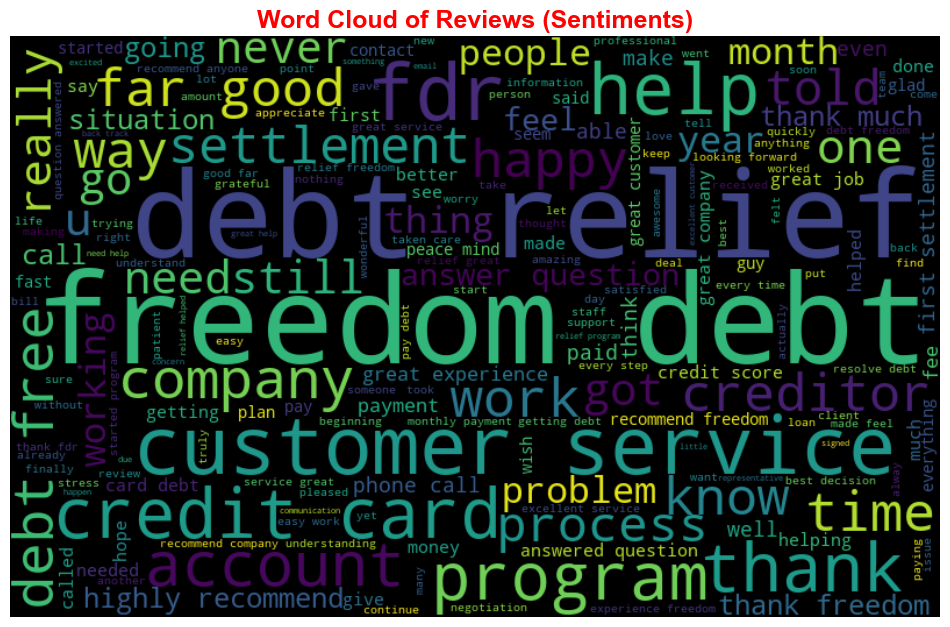

freedom debt: 1.0
debt relief: 0.9222702702702703
customer service: 0.31686486486486487
fdr: 0.296972972972973
help: 0.24151351351351352
credit card: 0.22756756756756757
thank: 0.22064864864864864
program: 0.2091891891891892
account: 0.18583783783783783
company: 0.15978378378378377
debt free: 0.15632432432432433
time: 0.14681081081081082
work: 0.14367567567567568
far good: 0.13827027027027028
know: 0.1362162162162162
way: 0.13556756756756758
happy: 0.13275675675675674
creditor: 0.1321081081081081
settlement: 0.12983783783783784
process: 0.1225945945945946
told: 0.11772972972972973
one: 0.1148108108108108
really: 0.10724324324324325
u: 0.10281081081081081
need: 0.10248648648648649
got: 0.10183783783783784
go: 0.09956756756756757
still: 0.0988108108108108
never: 0.0934054054054054
problem: 0.09124324324324325


In [40]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame with the 'Cleaned_Concatenated_Text' column

# Generate the word cloud
wordcloud = WordCloud(width=800, height=500).generate(' '.join(df['Cleaned_Concatenated_Text'].dropna()))

# Sort the word cloud in descending order
sorted_wordcloud = dict(sorted(wordcloud.words_.items(), key=lambda item: item[1], reverse=True))

# Get the top 30 results
top_30 = dict(list(sorted_wordcloud.items())[:30])

# Create a figure with the specified title
plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

# Set the title with custom font size and weight
plt.title('Word Cloud of Reviews (Sentiments)', fontsize=18, fontweight='bold', color='red')

# Show the word cloud
plt.show()

# Print the top 30 words as text output
for word, frequency in top_30.items():
    print(f'{word}: {frequency}')


Key Insights from Word Cloud for Freedom Debt Relief:

Central Themes: "Freedom Debt Relief" is central and highly relevant, emphasizing its significance in discussions.

Customer Service: Variability in customer service experiences is indicated, with a focus on the company's interactions with customers.

Positive Sentiments: Positive expressions like "thank" and "happy" are apparent, reflecting positive experiences with Freedom Debt Relief.

Financial Terminology: Common financial terms, such as "program," "account," and "settlement," are frequently mentioned, underlining financial aspects.

Diverse Experiences: Discussions encompass a wide range of experiences, including challenges and problem-solving related to the company's services.

Aspiration for Freedom: "Freedom" and "debt-free" reflect the desire for financial freedom and reduced debt, which aligns with the company's mission.

This word cloud analysis offers insights into the key themes, emotions, and financial aspects associated with discussions about Freedom Debt Relief, highlighting its central role in customer experiences and aspirations for financial freedom.

In [41]:
all_words = ' '.join(df['Cleaned_Concatenated_Text']).split()

# Count the occurrences of each word
word_counts = Counter(all_words)

# Sort the word counts in descending order
sorted_word_counts = dict(sorted(word_counts.items(), key=lambda item: item[1], reverse=True))

# Create a DataFrame for the first 50 most common words
word_counts_df = pd.DataFrame(list(sorted_word_counts.items()), columns=['Word', 'Count'])

print(word_counts_df.head(30))

          Word  Count
0         debt  23378
1      freedom  13691
2       relief  10538
3        great   8498
4         help   7257
5          fdr   6861
6      service   6251
7      helpful   6215
8      program   6158
9        would   6005
10         far   5740
11       thank   5637
12         get   5417
13     company   5280
14        good   5257
15      credit   4511
16        time   4406
17     account   4047
18         one   3948
19        work   3861
20    question   3684
21     process   3543
22    customer   3536
23        call   3528
24  settlement   3483
25       happy   3475
26  experience   3423
27   recommend   3242
28       month   3203
29        made   3197


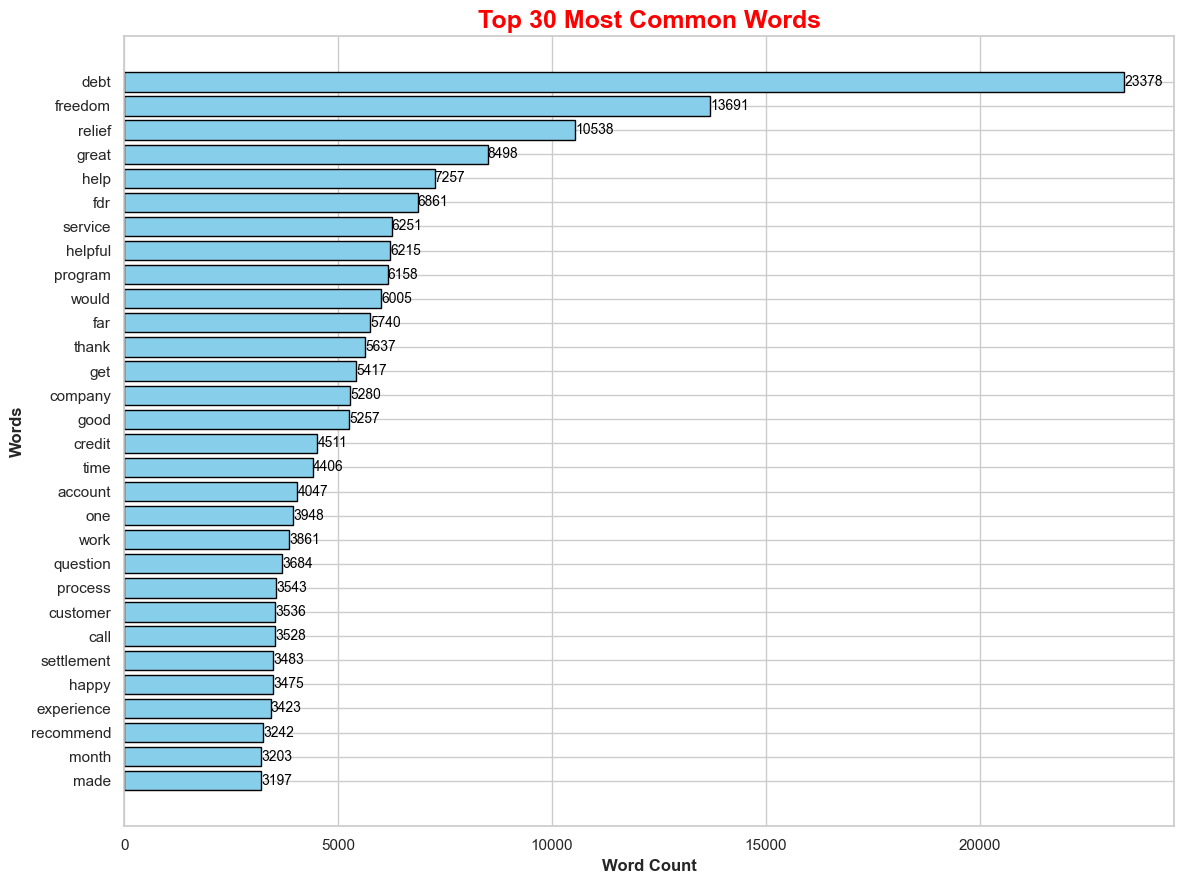

In [42]:
top_n = 30
top_words = list(sorted_word_counts.keys())[:top_n]
top_word_counts = list(sorted_word_counts.values())[:top_n]

# Choose a color for the bar chart
bar_color = 'skyblue'

# Create a horizontal bar chart with better readability
plt.figure(figsize=(12, 9))
bars = plt.barh(top_words, top_word_counts, color=bar_color, edgecolor='black', height=0.8)

# Add data values on each bar
for bar, count in zip(bars, top_word_counts):
    plt.text(bar.get_width() + 5, bar.get_y() + bar.get_height() / 2, str(count), va='center', fontsize=10, color='black')

# Set axis labels and invert the y-axis for better readability
plt.xlabel('Word Count', fontweight='bold')
plt.ylabel('Words', fontweight='bold')
plt.gca().invert_yaxis()

# Add a title with specified properties
plt.title('Top 30 Most Common Words', fontsize=18, fontweight='bold', color='red')

# Show the plot
plt.tight_layout()
plt.show()


### Sentiment Analysis

Sentiment analysis helps determine the sentiment (positive, negative, or neutral) of text data. VADER or TextBlob libraries for sentiment analysis were used


Analyzing the relationship between Ratings and Review Text can involve sentiment analysis to derive a sentiment score from the text and see if it aligns with the given Ratings. 
Here's a step-by-step guide on how you can do this:

#### 1. Sentiment Analysis:
You can use a sentiment analysis tool or library to analyze the sentiment of the review text. There are various sentiment analysis libraries available in Python, such as NLTK, TextBlob, VADER, and spaCy. Choose one that you are comfortable with.



In [43]:
#For example, using TextBlob:

from textblob import TextBlob

def analyze_sentiment(Cleaned_Concatenated_Text):
    analysis = TextBlob(Cleaned_Concatenated_Text)
    # Classify sentiment as positive, negative, or neutral
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'


#### 2. Assign Sentiment Scores:
You can assign numerical sentiment scores to each review based on the sentiment analysis. For example, you might assign a score of 5 for 'positive,' 3 for 'neutral,' and 1 for 'negative.'

In [44]:
def assign_sentiment_score(sentiment):
    if sentiment == 'positive':
        return 5
    elif sentiment == 'neutral':
        return 3
    else:
        return 1


#### 3. Calculate a New Rating:
Calculate a new rating for each review based on the sentiment score derived from the review text. You can simply average the sentiment scores from the reviews. This will give you a new rating for each review.

In [45]:
def calculate_new_rating(sentiment_score):
    # You can customize this formula as needed
    return (sentiment_score * 5) / 3

#### 4.Compare Given and Calculated Ratings:
Once you have the calculated ratings, you can compare them with the given ratings to assess how well the sentiment analysis aligns with the reviewer's direct ratings.

In [46]:
def compare_ratings(given_rating, calculated_rating):
    # Calculate the difference between given and calculated ratings
    rating_difference = given_rating - calculated_rating
    return rating_difference


In [47]:
def analyze_sentiment(Cleaned_Concatenated_Text):
    analyzer = SentimentIntensityAnalyzer()
    sentiment_scores = analyzer.polarity_scores(Cleaned_Concatenated_Text)
    return sentiment_scores

In [48]:
# Apply sentiment analysis to the 'Cleaned_Concatenated_Text' column
df['Sentiment_Scores'] = df['Cleaned_Concatenated_Text'].apply(analyze_sentiment)

# Extract the sentiment labels (positive, negative, neutral)
df['Sentiment_Label'] = df['Sentiment_Scores'].apply(lambda x: 'positive' if x['compound'] > 0 else ('negative' if x['compound'] < 0 else 'neutral'))

print("Sentiment Scores:")
print(df['Sentiment_Scores'])

print("\nSentiment Labels:")
print(df['Sentiment_Label'])

Sentiment Scores:
2        {'neg': 0.0, 'neu': 0.37, 'pos': 0.63, 'compou...
3        {'neg': 0.0, 'neu': 0.63, 'pos': 0.37, 'compou...
4        {'neg': 0.0, 'neu': 0.829, 'pos': 0.171, 'comp...
5        {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
6        {'neg': 0.229, 'neu': 0.71, 'pos': 0.061, 'com...
                               ...                        
39073    {'neg': 0.0, 'neu': 0.792, 'pos': 0.208, 'comp...
39074    {'neg': 0.179, 'neu': 0.394, 'pos': 0.427, 'co...
39075    {'neg': 0.0, 'neu': 0.559, 'pos': 0.441, 'comp...
39076    {'neg': 0.112, 'neu': 0.741, 'pos': 0.146, 'co...
39077    {'neg': 0.0, 'neu': 0.405, 'pos': 0.595, 'comp...
Name: Sentiment_Scores, Length: 33454, dtype: object

Sentiment Labels:
2        positive
3        positive
4        positive
5         neutral
6        negative
           ...   
39073    positive
39074    positive
39075    positive
39076    positive
39077    positive
Name: Sentiment_Label, Length: 33454, dtype: object


Sentiment Label Counts and Percentages:
positive: Count = 29856, Percentage = 89.2%
negative: Count = 2386, Percentage = 7.1%
neutral: Count = 1212, Percentage = 3.6%


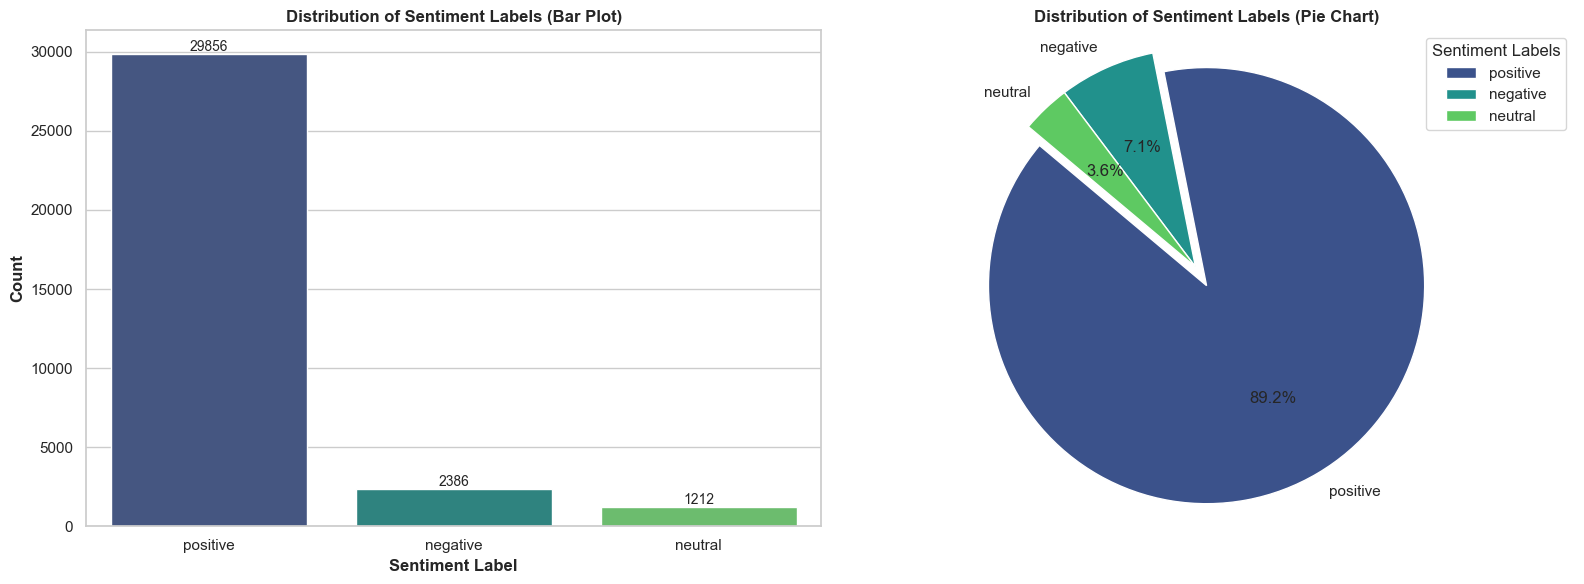

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the counts of each sentiment label
sentiment_counts = df['Sentiment_Label'].value_counts()

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Create the bar plot
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, hue=sentiment_counts.index, palette='viridis', ax=ax1)
ax1.set_xlabel('Sentiment Label', weight='bold')
ax1.set_ylabel('Count', weight='bold')
ax1.set_title('Distribution of Sentiment Labels (Bar Plot)', fontsize=12, weight='bold')

for i, count in enumerate(sentiment_counts.values):
    ax1.text(i, count, str(count), ha='center', va='bottom', fontsize=10)

# Create the pie chart with custom settings
colors = sns.color_palette('viridis', len(sentiment_counts))
explode = (0.1, 0, 0)  # Explode the 1st slice (positive sentiment)

# Create the pie chart
ax2.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode)
ax2.set_title('Distribution of Sentiment Labels (Pie Chart)', fontsize=12, weight='bold')

# Add a legend
ax2.legend(sentiment_counts.index, title='Sentiment Labels', loc='upper right')

ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Print text output
print("Sentiment Label Counts and Percentages:")
total_count = sentiment_counts.sum()
for label, count in zip(sentiment_counts.index, sentiment_counts.values):
    percentage = (count / total_count) * 100
    print(f"{label}: Count = {count}, Percentage = {percentage:.1f}%")

plt.tight_layout()
plt.show()

#### Topic Modeling

Topic modeling helps identify the main topics within a collection of documents. Latent Dirichlet Allocation (LDA) topic modeling using the Gensim library were used.

In [50]:
# Tokenize and preprocess text (using the 'Cleaned_Concatenated_Text' column)
tokenized_reviews = [word_tokenize(text) for text in df['Cleaned_Concatenated_Text']]

# Create a dictionary and corpus for LDA
dictionary = corpora.Dictionary(tokenized_reviews)
corpus = [dictionary.doc2bow(text) for text in tokenized_reviews]

# Train an LDA model
lda_model = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

# Get topics and associated words
topics = lda_model.print_topics(num_words=5)

# Print the topics
for topic in topics:
    print(topic)


(0, '0.092*"service" + 0.051*"customer" + 0.026*"excellent" + 0.022*"great" + 0.019*"call"')
(1, '0.123*"debt" + 0.084*"freedom" + 0.064*"relief" + 0.031*"help" + 0.025*"thank"')
(2, '0.017*"credit" + 0.016*"account" + 0.016*"debt" + 0.015*"payment" + 0.015*"one"')
(3, '0.072*"helpful" + 0.043*"question" + 0.028*"always" + 0.024*"professional" + 0.018*"everyone"')
(4, '0.056*"great" + 0.056*"far" + 0.052*"good" + 0.029*"experience" + 0.029*"program"')


In [51]:
!pip install vaderSentiment

Sentiment Label Counts and Percentages:
Positive: Count = 29766, Percentage = 89.0%
Negative: Count = 2245, Percentage = 6.7%


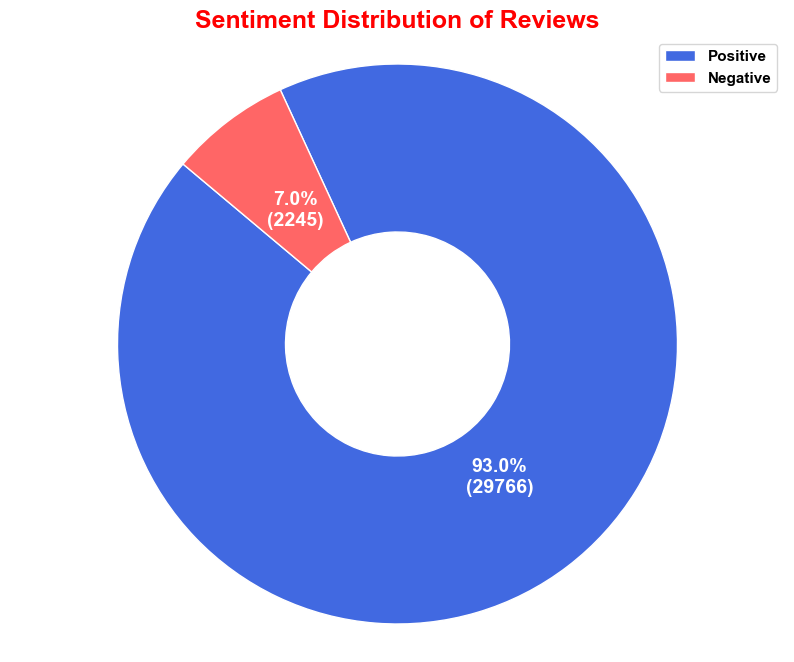

In [77]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Initialize the sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Define a function to classify reviews as positive, negative, or neutral
def classify_sentiment(text):
    sentiment_scores = analyzer.polarity_scores(text)
    compound_score = sentiment_scores['compound']

    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment classification to the 'Cleaned_Concatenated_Text' column
df['Sentiment_Label'] = df['Cleaned_Concatenated_Text'].apply(classify_sentiment)

# Count the number of positive and negative reviews
positive_reviews_count = len(df[df['Sentiment_Label'] == 'Positive'])
negative_reviews_count = len(df[df['Sentiment_Label'] == 'Negative'])

# Create a pie chart to visualize the distribution of positive and negative reviews
labels = ['Positive', 'Negative']
sizes = [positive_reviews_count, negative_reviews_count]
colors = ['#4169E1', '#FF6666']  # Blue for positive, red for negative

plt.figure(figsize=(10, 8))

# Plot the pie chart with percentage values below the text
# plt.pie(sizes, colors=colors, autopct=lambda p: '{:.1f}%\n({:.0f})'.format(p, p * sum(sizes) / 100),
#        startangle=140, wedgeprops=dict(width=0.6))

# Create a pie chart
plt.pie(sizes, colors=colors, autopct=lambda p: '{:.1f}%\n({:.0f})'.format(p, p * sum(sizes) / 100),
        startangle=140, wedgeprops=dict(width=0.6))

# Set the font size and weight for the text
plt.rcParams['font.size'] = 14
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['text.color'] = 'white'



plt.title('Sentiment Distribution of Reviews', fontsize=18, fontweight='bold', color='red')

legend = plt.legend(labels, loc='upper right')
for text in legend.get_texts():
    text.set_color('black')

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Print text output
print("Sentiment Label Counts and Percentages:")
total_count = len(df)
positive_percentage = (positive_reviews_count / total_count) * 100
negative_percentage = (negative_reviews_count / total_count) * 100
print(f"Positive: Count = {positive_reviews_count}, Percentage = {positive_percentage:.1f}%")
print(f"Negative: Count = {negative_reviews_count}, Percentage = {negative_percentage:.1f}%")

plt.show()


#### Sentiment Trends Over Time

Sentiment Trends Over Time (Quarterly):
Sentiment_Label  Negative  Neutral  Positive
Review Date                                 
2014-03-31             24        7       178
2014-06-30             16        5       268
2014-09-30             16        3       144
2014-12-31              5        0        92
2015-03-31             10        2       144
2015-06-30             13        4       179
2015-09-30              7        2       208
2015-12-31              5        8       188
2016-03-31             24        3       182
2016-06-30             29        8       230
2016-09-30             13        6       134
2016-12-31             18        7       203
2017-03-31             19        5       157
2017-06-30             21        7       227
2017-09-30             16       22       309
2017-12-31            157      115      2351
2018-03-31            131       97      2102
2018-06-30            110       97      1931
2018-09-30            131       92      2196
2018-12-31     

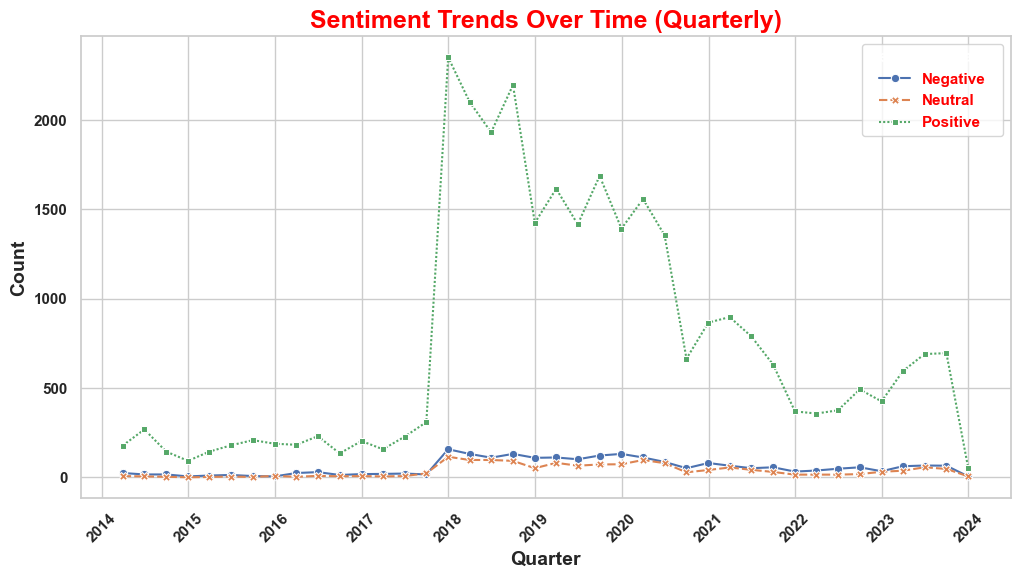

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the 'Review Date' column to a datetime object (if it's not already)
df['Review Date'] = pd.to_datetime(df['Review Date'])

# Group the data by quarter and sentiment label, and count the occurrences
sentiment_trends_quarterly = df.groupby([pd.Grouper(key='Review Date', freq='Q'), 'Sentiment_Label']).size().unstack(fill_value=0)

# Print text output for grouped values
print("Sentiment Trends Over Time (Quarterly):")
print(sentiment_trends_quarterly)

# Plot the sentiment trends over time (quarterly)
plt.figure(figsize=(12, 6))
sns.lineplot(data=sentiment_trends_quarterly, markers=True)
plt.title('Sentiment Trends Over Time (Quarterly)', weight='bold', fontsize=18, color='red')
plt.xlabel('Quarter', weight='bold', fontsize=14)
plt.ylabel('Count', weight='bold', fontsize=14)
legend = plt.legend(title='Sentiment Label', loc='upper right')
for text in legend.get_texts():
    text.set_color('red')  # Set legend text color to red
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()


In [54]:
# Group the data by date and sentiment label, and count the occurrences
sentiment_trends = df.groupby(['Review Date', 'Sentiment_Label']).size().unstack(fill_value=0)

# Reset the index to have 'Date' as a column
sentiment_trends.reset_index(inplace=True)

# Set 'Date' column as the index for the DataFrame
sentiment_trends.set_index('Review Date', inplace=True)

# Filter the DataFrame for only the "Negative" sentiment label
negative_sentiment_trends = sentiment_trends['Negative']

Negative Sentiment Trends Over Time (Quarterly):
Review Date
2014-03-31     24
2014-06-30     16
2014-09-30     16
2014-12-31      5
2015-03-31     10
2015-06-30     13
2015-09-30      7
2015-12-31      5
2016-03-31     24
2016-06-30     29
2016-09-30     13
2016-12-31     18
2017-03-31     19
2017-06-30     21
2017-09-30     16
2017-12-31    157
2018-03-31    131
2018-06-30    110
2018-09-30    131
2018-12-31    109
2019-03-31    111
2019-06-30    101
2019-09-30    122
2019-12-31    131
2020-03-31    111
2020-06-30     86
2020-09-30     51
2020-12-31     80
2021-03-31     65
2021-06-30     51
2021-09-30     56
2021-12-31     32
2022-03-31     38
2022-06-30     48
2022-09-30     56
2022-12-31     34
2023-03-31     62
2023-06-30     66
2023-09-30     65
2023-12-31      5
Freq: Q-DEC, dtype: int64


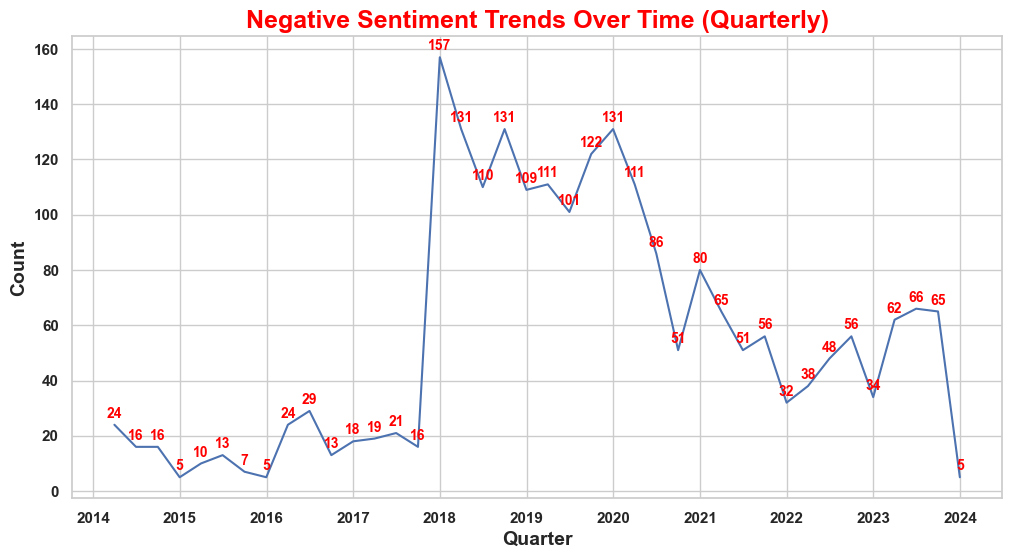

Top Negative Values:
2014-03-31 00:00:00: 24
2014-06-30 00:00:00: 16
2014-09-30 00:00:00: 16
2014-12-31 00:00:00: 5
2015-03-31 00:00:00: 10
2015-06-30 00:00:00: 13
2015-09-30 00:00:00: 7
2015-12-31 00:00:00: 5
2016-03-31 00:00:00: 24
2016-06-30 00:00:00: 29
2016-09-30 00:00:00: 13
2016-12-31 00:00:00: 18
2017-03-31 00:00:00: 19
2017-06-30 00:00:00: 21
2017-09-30 00:00:00: 16
2017-12-31 00:00:00: 157
2018-03-31 00:00:00: 131
2018-06-30 00:00:00: 110
2018-09-30 00:00:00: 131
2018-12-31 00:00:00: 109
2019-03-31 00:00:00: 111
2019-06-30 00:00:00: 101
2019-09-30 00:00:00: 122
2019-12-31 00:00:00: 131
2020-03-31 00:00:00: 111
2020-06-30 00:00:00: 86
2020-09-30 00:00:00: 51
2020-12-31 00:00:00: 80
2021-03-31 00:00:00: 65
2021-06-30 00:00:00: 51
2021-09-30 00:00:00: 56
2021-12-31 00:00:00: 32
2022-03-31 00:00:00: 38
2022-06-30 00:00:00: 48
2022-09-30 00:00:00: 56
2022-12-31 00:00:00: 34
2023-03-31 00:00:00: 62
2023-06-30 00:00:00: 66
2023-09-30 00:00:00: 65
2023-12-31 00:00:00: 5


In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the 'Review Date' column to a datetime object (if it's not already)
df['Review Date'] = pd.to_datetime(df['Review Date'])

# Group the data by quarter and sentiment label, and count the occurrences
negative_sentiment_trends_quarterly = df[df['Sentiment_Label'] == 'Negative'].groupby([pd.Grouper(key='Review Date', freq='Q')]).size()

# Print text output for quarterly negative sentiment trends
print("Negative Sentiment Trends Over Time (Quarterly):")
print(negative_sentiment_trends_quarterly)

# Plot the negative sentiment trends over time (quarterly)
plt.figure(figsize=(12, 6))
sns.lineplot(data=negative_sentiment_trends_quarterly, markers=True)
plt.title('Negative Sentiment Trends Over Time (Quarterly)', weight='bold', fontsize=18, color='red')
plt.xlabel('Quarter', weight='bold', fontsize=14)
plt.ylabel('Count', weight='bold', fontsize=14)
plt.grid(True)

# Annotate all elbow values on the line in red
for quarter, count in negative_sentiment_trends_quarterly.items():
    plt.annotate(f'{count}', (quarter, count), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=10, color='red')

plt.show()

# Print the top negative values and quarters
print("Top Negative Values:")
for quarter, count in negative_sentiment_trends_quarterly.items():
    print(f"{quarter}: {count}")


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33454 entries, 2 to 39077
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype          
---  ------                     --------------  -----          
 0   Reviewer Name              33454 non-null  object         
 1   Reviews Count              33454 non-null  Int64          
 2   Country Code               33454 non-null  object         
 3   Experience Date            33454 non-null  datetime64[ns] 
 4   Rating                     33454 non-null  int64          
 5   Review Date                33454 non-null  datetime64[ns] 
 6   Review Title               33454 non-null  object         
 7   Review Text                33454 non-null  object         
 8   Reply Date                 31901 non-null  datetime64[ns] 
 9   Reply Text                 32135 non-null  object         
 10  Country Name               33454 non-null  object         
 11  Year                       33454 non-null  int32          


## Deep Learning Model (BERT)

In [84]:
# Extract text data and labels
text_data = df["Cleaned_Concatenated_Text"]
labels = df["Rating"]

# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Tokenize and pad the text data
max_seq_length = 64  # Specify your desired sequence length

In [86]:
# Assuming you have defined max_seq_length and text_data earlier

# Define batch size
batch_size = 8  # You can adjust this value based on your requirements

# Group reviews by their length (number of tokens)
grouped_reviews = {}
for idx, text in enumerate(text_data):
    encoded_dict = tokenizer.encode_plus(
        text,
        add_special_tokens=True,
        max_length=max_seq_length,
        return_attention_mask=True,
        return_tensors='pt',
        truncation=True  # Explicitly truncate examples to max length
    )

    review_length = encoded_dict['input_ids'].size(1)
    if review_length not in grouped_reviews:
        grouped_reviews[review_length] = {
            'input_ids': [],
            'attention_mask': []
        }

    grouped_reviews[review_length]['input_ids'].append(encoded_dict['input_ids'])
    grouped_reviews[review_length]['attention_mask'].append(encoded_dict['attention_mask'])

# Create DataLoaders
data_loaders = []

for length, group in grouped_reviews.items():
    num_samples = len(group['input_ids'])
    input_ids_subset = torch.cat(group['input_ids'], dim=0)
    attention_masks_subset = torch.cat(group['attention_mask'], dim=0)
    labels_subset = torch.tensor(labels.values[:num_samples] - 1, dtype=torch.long)  # Adjust labels

    dataset = TensorDataset(input_ids_subset, attention_masks_subset, labels_subset)
    data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    data_loaders.append(data_loader)


In [89]:
pip install transformers


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 1.6 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.19.4
    Uninstalling huggingface-hub-0.19.4:
      Successfully uninstalled huggingface-hub-0.19.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datasets 2.15.0 requires huggingface-hub>=0.18.0, but you have huggingface-hub 0.17.3 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [90]:
# Assuming you have already loaded the BERT model and created data_loaders

# Import necessary libraries
from transformers import AdamW
import torch.nn as nn

# Set up the optimizer and loss function
optimizer = AdamW(model.parameters(), lr=5e-5)
loss_fn = nn.CrossEntropyLoss()

# Fine-tune the model
num_epochs = 3  # You can adjust this based on your requirements

for epoch in range(num_epochs):
    model.train()
    for data_loader in data_loaders:
        for batch in data_loader:
            input_ids, attention_mask, labels = batch
            optimizer.zero_grad()
            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            loss.backward()
            optimizer.step()

# Now, your model is fine-tuned, and you can use it for predictions


/Users/arifaygun/.pyenv/versions/3.11.0/lib/python3.11/site-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
# Set training hyperparameters
epochs = 3
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-5)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move the model to the device (CPU or GPU)
model.to(device)

In [ ]:
# Training loop
for epoch in range(epochs):
    model.train()
    for batch in train_dataloader:
        input_ids, attention_mask, labels = batch
        input_ids = input_ids.to(device)
        attention_mask = attention_mask.to(device)
        # Adjust labels to be 0-indexed
        labels = labels - 1
        labels = labels.to(device)
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()


In [ ]:
# Evaluation
model.eval()
val_loss = 0
val_preds = []
with torch.no_with():
    for batch in val_dataloader:
        input_ids, attention_mask, labels = batch
        input_ids = input_ids.to(device)
        attention_mask = attention_mask.to(device)
        labels = labels.to(device)
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        val_loss += outputs.loss.item()
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1)
        val_preds.extend(preds.cpu().numpy())

In [ ]:
# Calculate validation loss and print classification report
val_loss /= len(val_dataloader)
print(f"Validation Loss: {val_loss}")
target_names = ['Rating 1', 'Rating 2', 'Rating3', 'Rating 4', 'Rating 5']
print(classification_report(val_labels, val_preds, target_names=target_names))
